In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PREPARATION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep=";")
#df = pd.read_csv('marketing_campaign.csv', sep=";")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# EDA - STAGE 1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df['Income'] = df['Income'].fillna((df['Income'].median()))
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
#total campaign accepted
df['AcceptedCmptot'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5']

#Age : this year (example 2014) - Year birth
df['Age'] = 2014 - df['Year_Birth'] 

#customer month
df['Customer_Months'] = (pd.to_datetime("2014-12-31") - pd.to_datetime(df['Dt_Customer'])) // np.timedelta64(1,'M')  

display(df.head(3))
print('')
display(df.tail(3))

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  AcceptedCmptot  \
0             0         0              3         11         1               0   
1             0         0              3         11         0               0   
2             0         0              3         11         0               0   

   Age  Customer_Months  
0   57               27  
1   60                9  
2   49               16  

[3 rows x 32 columns]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2237  7270        1981  Graduation       Divorced  56981.0        0         0   
2238  8235        1956      Master       Together  69245.0        0         1   
2239  9405        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
2237  2014-01-25       91       908  ...             0             0   
2238  2014-01-24        8       428  ...             0             0   
2239  2012-10-15       40        84  ...             0             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
2237             0         0              3         11         0   
2238             0         0              3         11         0   
2239             0         0              3         11         1   

      AcceptedCmptot  Age  Customer_Months  
2237               1   33               11  
2238               0   58               11  
2239               0   60               26  

[3 rows x 32 columns]

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'AcceptedCmptot', 'Age', 'Customer_Months'],
      dtype='object')

In [11]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [12]:
# kategori YOLO, Alone, Absurd pada marital_status dimasukkan ke dalam kategori Single karena memiliki pengertian yang sama
df = df.replace({'Marital_Status' : {'YOLO' : 'Single', 'Alone' : 'Single', 'Absurd' : 'Single'}})
print(df['Marital_Status'].value_counts())

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


In [13]:
df = df.replace({'Education' : {'Basic' : 'Elementary Sch', '2n Cycle' : 'Middle-High Sch'}})
print(df['Education'].value_counts())

Graduation         1127
PhD                 486
Master              370
Middle-High Sch     203
Elementary Sch       54
Name: Education, dtype: int64


## Descriptive Statistics

In [14]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2240.0  52237.975446  25037.955891  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
AcceptedCmptot       2240.0      0.297768      0.678381     0.0      0.00   
Age                  2240.0     45.194196     11.984069    18.0     37.00   
Customer_Months      2240.0     17.194643      6.622911     6.0     11.75   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0  
AcceptedCmptot           0.0      0.00       4.0  
Age                     44.0     55.00     121.0  
Customer_Months         17.0     23.00      29.0

- Tidak terdapat nilai duplikat pada data
- Semua tipe data sudah sesuai kecuali pada variabel Dt_Customer sehingga diconvert menjadi date type kemudian dibuat variabel baru untuk mendapatkan lama customer join ke company
- Variabel income memiliki mean dan median yang hampir sama, namun nilai max yang sangat tinggi menunjukkan adanya indikasi outlier
- Tidak ada nilai statistika yang aneh pada variabel kidhome, teenhome, dan recency
- Pada variabel amount spent on products terlihat bahwa SEMUA PRODUK memiliki mean yang lebih besar dari median yang menandakan pola distribusi positively skewed
- Sementara itu, tidak terjadi keanehan nilai statistik pada number of purchase
- Meskipun variabel age tidak menunjukkan statistik yang aneh, namun terlihat bahwa usia customer tertua yaitu 121 tahun dimana nilai ini sangat jauh dari rata-rata
- Variabel customer_months memiliki pola distribusi yang simetris, dapat dilihat dari nilai mean median yang hampir sama
- Kolom Z_CostContact dan Z_Revenue tidak dimasukkan dalam pemodelan karena mengandung nilai yang sama
- Terdapat missing value pada variabel income sebanyak 1.07 %, dilakukan imputasi menggunakan median

## Univariate Analysis

In [15]:
demographic = ['Income', 'Age', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot' ]
spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

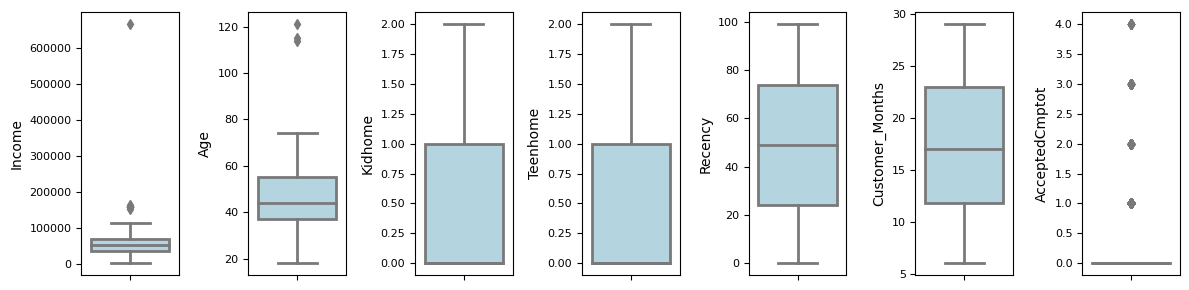

In [16]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic)):
    plt.subplot(1, len(demographic), i+1)
    sns.boxplot(y=df[demographic[i]], color='lightblue', orient='v')
    plt.tight_layout()

- Variabel Income memiliki outlier yang sangat tinggi sehingga dilakukan penanganan menggunakan nilai batas atas
- Outlier pada variabel age tidak diatasi
- Recency dan customer month terlihat memiliki pola distribusi yang simetris

In [17]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [18]:
df['Income_new'] = df['Income']
low, high = outlier(df['Income_new'])

#replacing outlier with upper bound and lower bound value
df['Income_new'] = np.where(df['Income_new']>high, high, df['Income_new'])
df['Income_new'] = np.where(df['Income_new']<low, low, df['Income_new'])

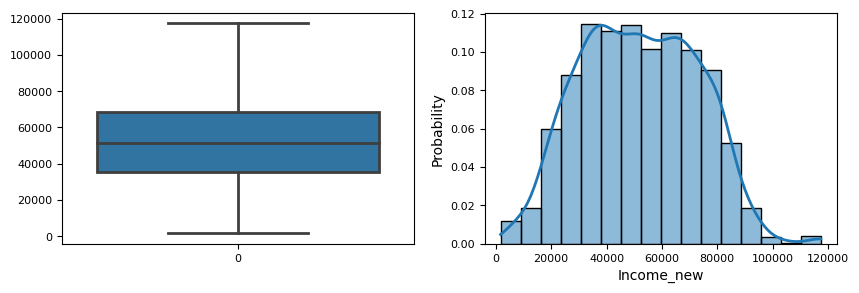

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.boxplot(ax=axes[0], data = df['Income_new'])
sns.histplot(ax=axes[1], data = df, x = "Income_new", kde = True, stat = "probability", bins=int(80/5))
plt.show()

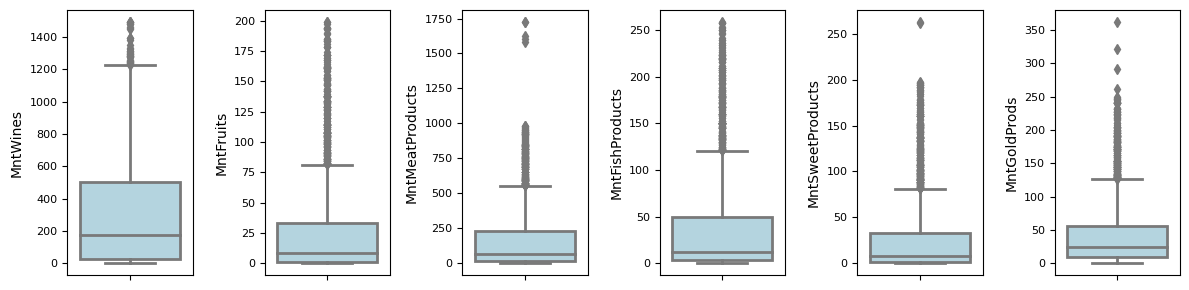

In [20]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(spent)):
    plt.subplot(1, len(spent), i+1)
    sns.boxplot(y=df[spent[i]], color='lightblue', orient='v')
    plt.tight_layout()

Dari penggambaran boxplot diketahui bahwa amount purchases untuk produk Wine memiliki nilai tertinggi, dimana sebaran data dari 0 - 500 sampai memiliki customer outlier dengan pembelian mencapai 1200 - 1400 dollar.

Dari visual boxplot juga diketahui bahwa persebaran setiap produk memiliki pola right skewness dimana nilai mean lebih besar dari median dengan frekuensi terbesar untuk pembelian Wine berada pada range 180. Berdasarkan boxplot diatas customer sangat menyukai produk wine dari store ini sehingga menjadi peluang untuk campaign selanjutnya mempromosikan Wine. 

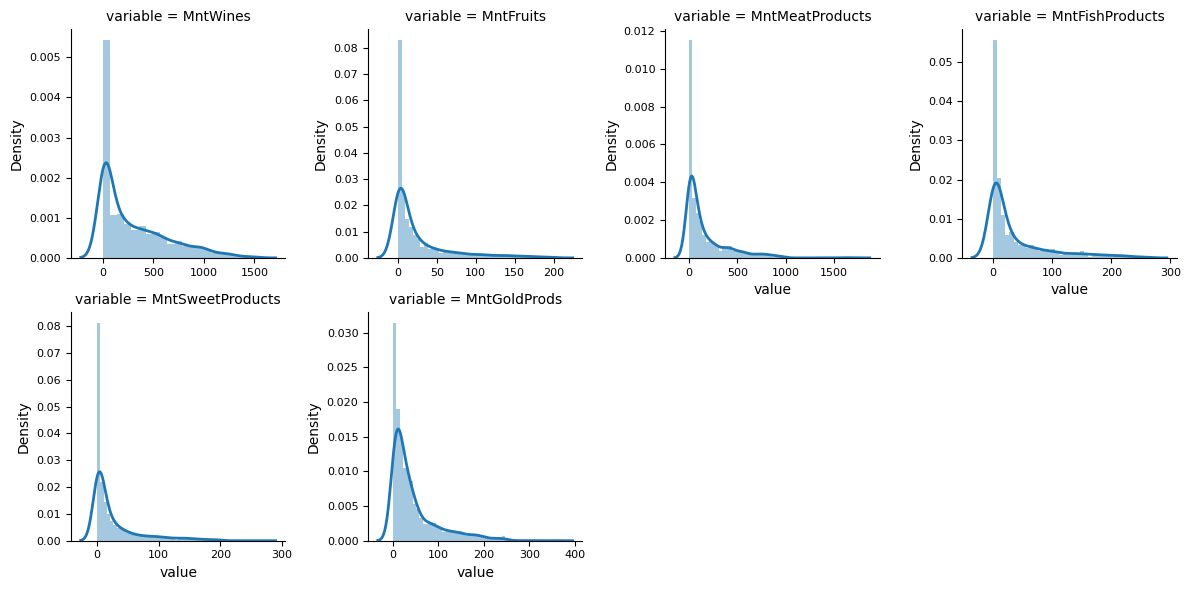

In [21]:
#Analisis Untuk Amount Spent dari customer untuk setiap produk 
df1 = pd.DataFrame(data=df, columns=spent)
nd = pd.melt(df1, value_vars =df1 )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
plt.show()

Dari persebaran grafik diatas dapat dilihat bahwa customer sangat tertarik untuk berbelanja produk Wine.

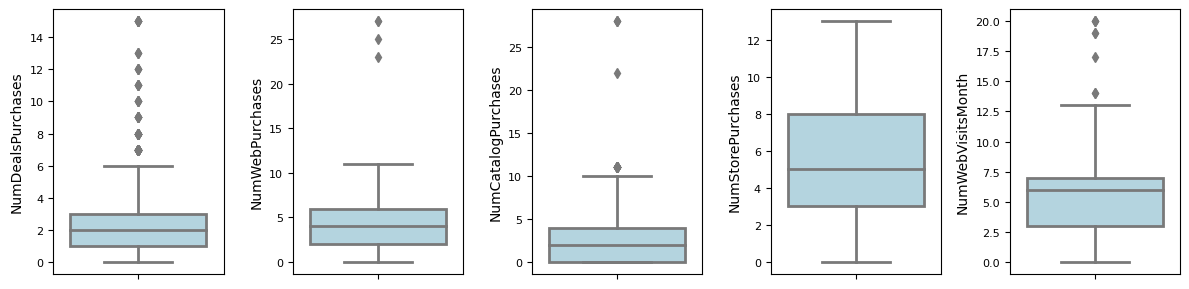

In [22]:
for i in range(0, len(purchase)):
    plt.subplot(1, len(purchase), i+1)
    sns.boxplot(y=df[purchase[i]], color='lightblue', orient='v')
    plt.tight_layout()

Dari boxplot diatas dapat ditunjukkan bahwa customer sering berbelanja apabila ada diskon dimana persebaran data NumDealsPurchases atau pembelian langsung berada pada range 1-3 dengan banyak outlier diatas 6 kali pembelian.

Selain itu customer untuk store ini juga sering berbelanja langusng dimana NumStorePurchases memiliki persebaran dengan left skewed dengan nilai rage antara 3 - 8 dengan tidak ada outlier.

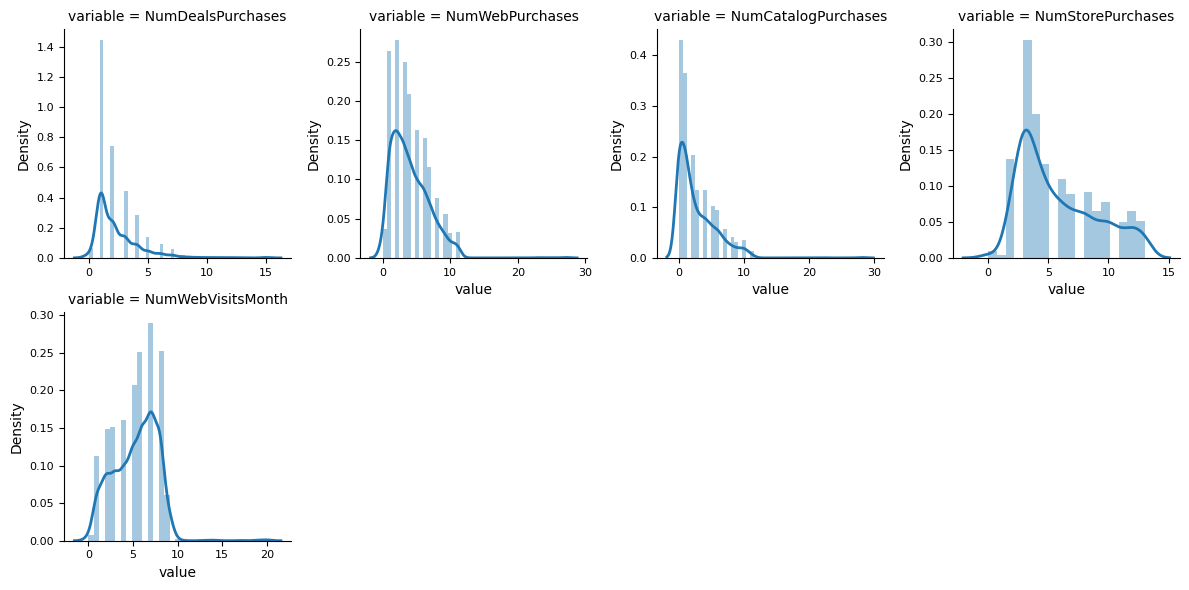

In [23]:
#Analisis NumPurchases atau pembelian setiap customer yang telah berbelanja.
df2 = pd.DataFrame(data=df, columns=purchase)
nd = pd.melt(df2, value_vars =df2 )
n2 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n2 = n2.map(sns.distplot, 'value')
n2
plt.show()

Berdasarkan persebaran grafik diatas customer lebih memilih untuk berbelanja langsung ke lokasi store langsung.

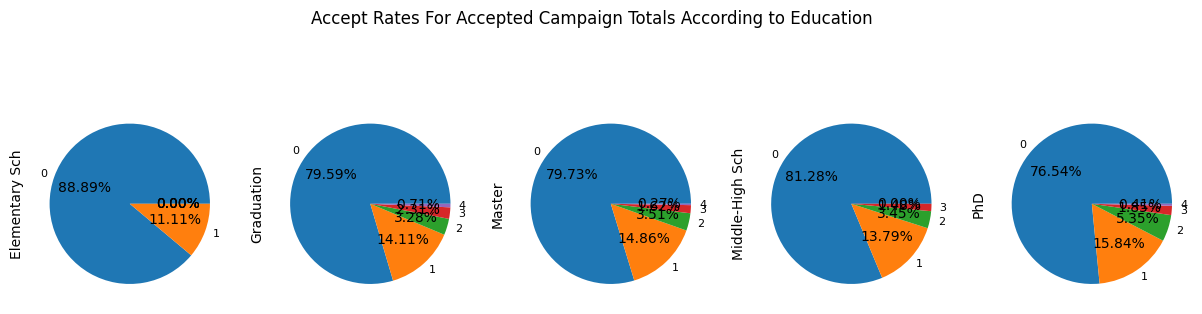

In [24]:
campaigns = ["AcceptedCmptot"]
for i in campaigns:
  pd.crosstab(index= df[i], columns=df['Education']).plot(kind="pie", figsize=(15, 4), 
                                                          subplots=True, autopct='%1.2f%%', 
                                                          legend=False, 
                                                          title=f"Accept Rates For Accepted Campaign Totals According to Education")
  plt.show()

Dari pie chart diatas, dapat ditunjukkan bahwa semakin tinggi tingkat pendidikan, kemungkinan untuk customer accept campaign juga semakin besar.

## Multivariate Analysis

### Hubungan variabel dengan target

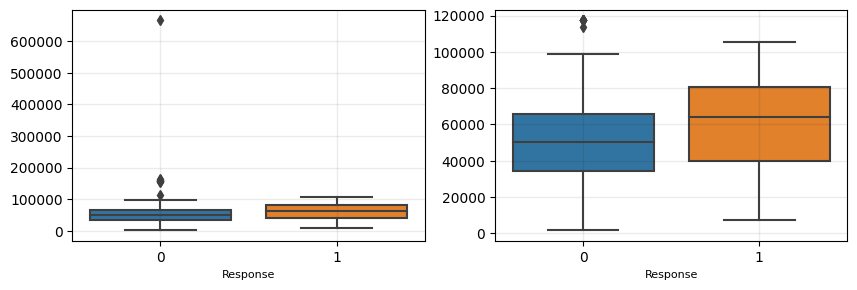

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.style.use('default')
sns.boxplot(ax=axes[0], y='Income', x='Response', data=df)
sns.boxplot(ax=axes[1], y='Income_new', x='Response', data=df)

for ax in axes:
    ax.grid(c = 'black', lw = 1, axis = 'both', alpha = 0.08)
    ax.set_ylabel(None)
    ax.set_xlabel('Response', fontsize=8)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

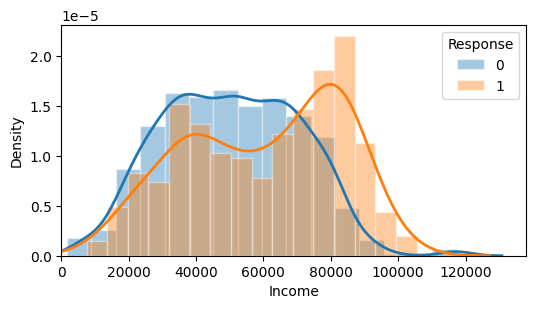

In [26]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Income_new'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

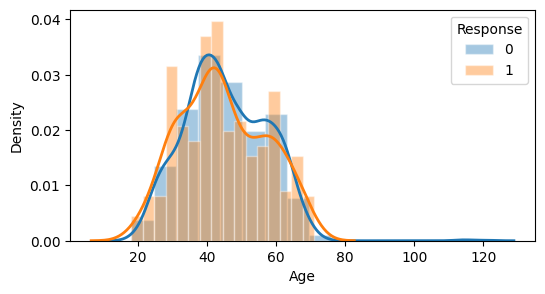

In [27]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Age'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

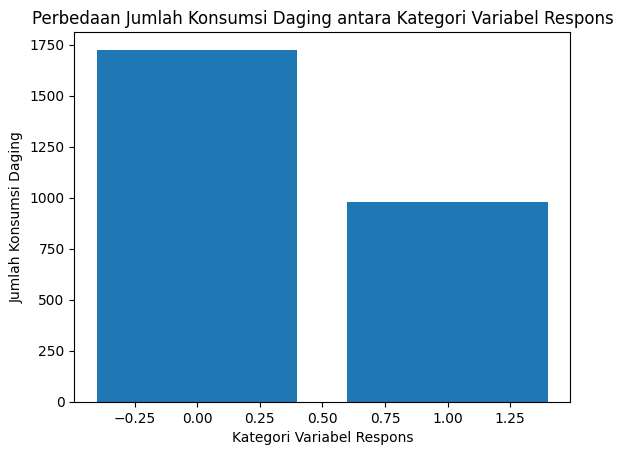

In [28]:
plt.bar(df['Response'], df['MntMeatProducts'])
plt.xlabel('Kategori Variabel Respons')
plt.ylabel('Jumlah Konsumsi Daging')
plt.title('Perbedaan Jumlah Konsumsi Daging antara Kategori Variabel Respons')
plt.show()

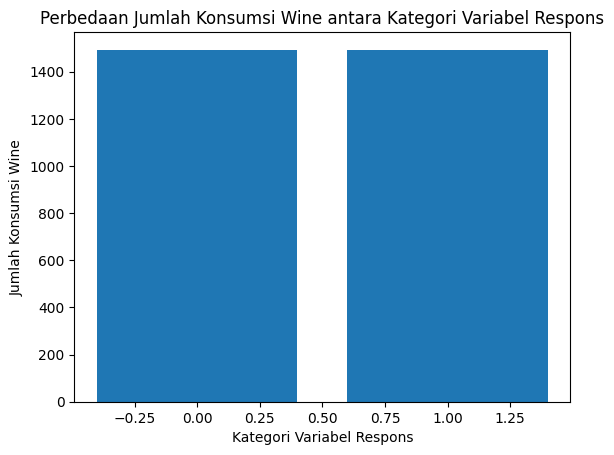

In [29]:
plt.bar(df['Response'], df['MntWines'])
plt.xlabel('Kategori Variabel Respons')
plt.ylabel('Jumlah Konsumsi Wine')
plt.title('Perbedaan Jumlah Konsumsi Wine antara Kategori Variabel Respons')
plt.show()

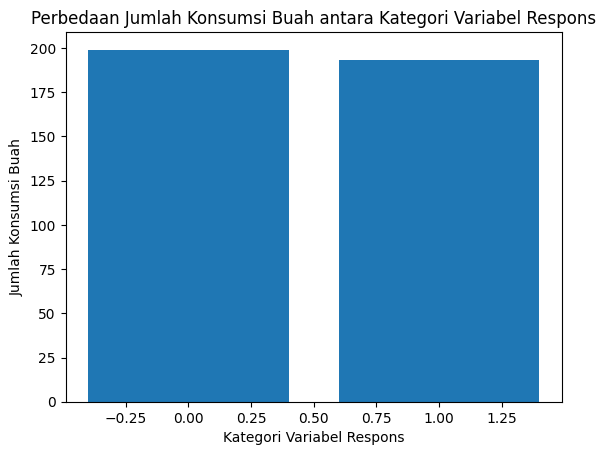

In [30]:
plt.bar(df['Response'], df['MntFruits'])
plt.xlabel('Kategori Variabel Respons')
plt.ylabel('Jumlah Konsumsi Buah')
plt.title('Perbedaan Jumlah Konsumsi Buah antara Kategori Variabel Respons')
plt.show()

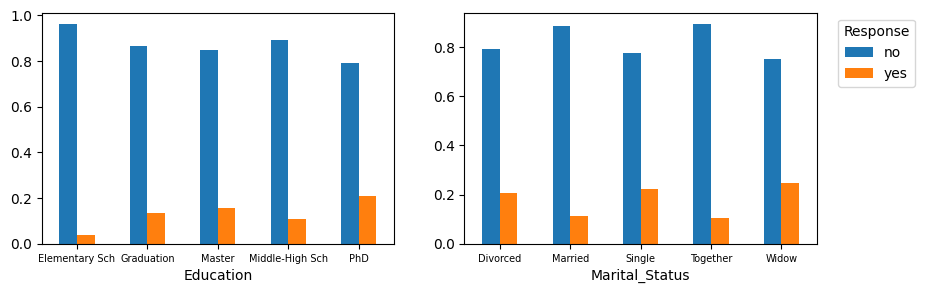

In [31]:
byEducation = df.groupby('Education').Response.value_counts(normalize=True)
byMarital = df.groupby('Marital_Status').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = byEducation.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byMarital.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=7)

plt.legend(labels = ["no", "yes"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

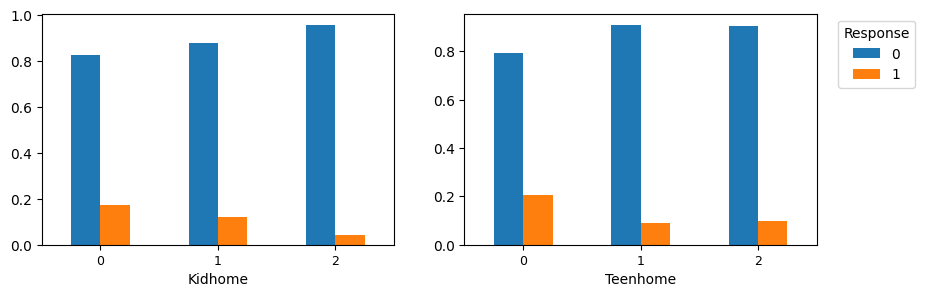

In [32]:
bykidhome = df.groupby('Kidhome').Response.value_counts(normalize=True)
byteenhome = df.groupby('Teenhome').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = bykidhome.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byteenhome.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

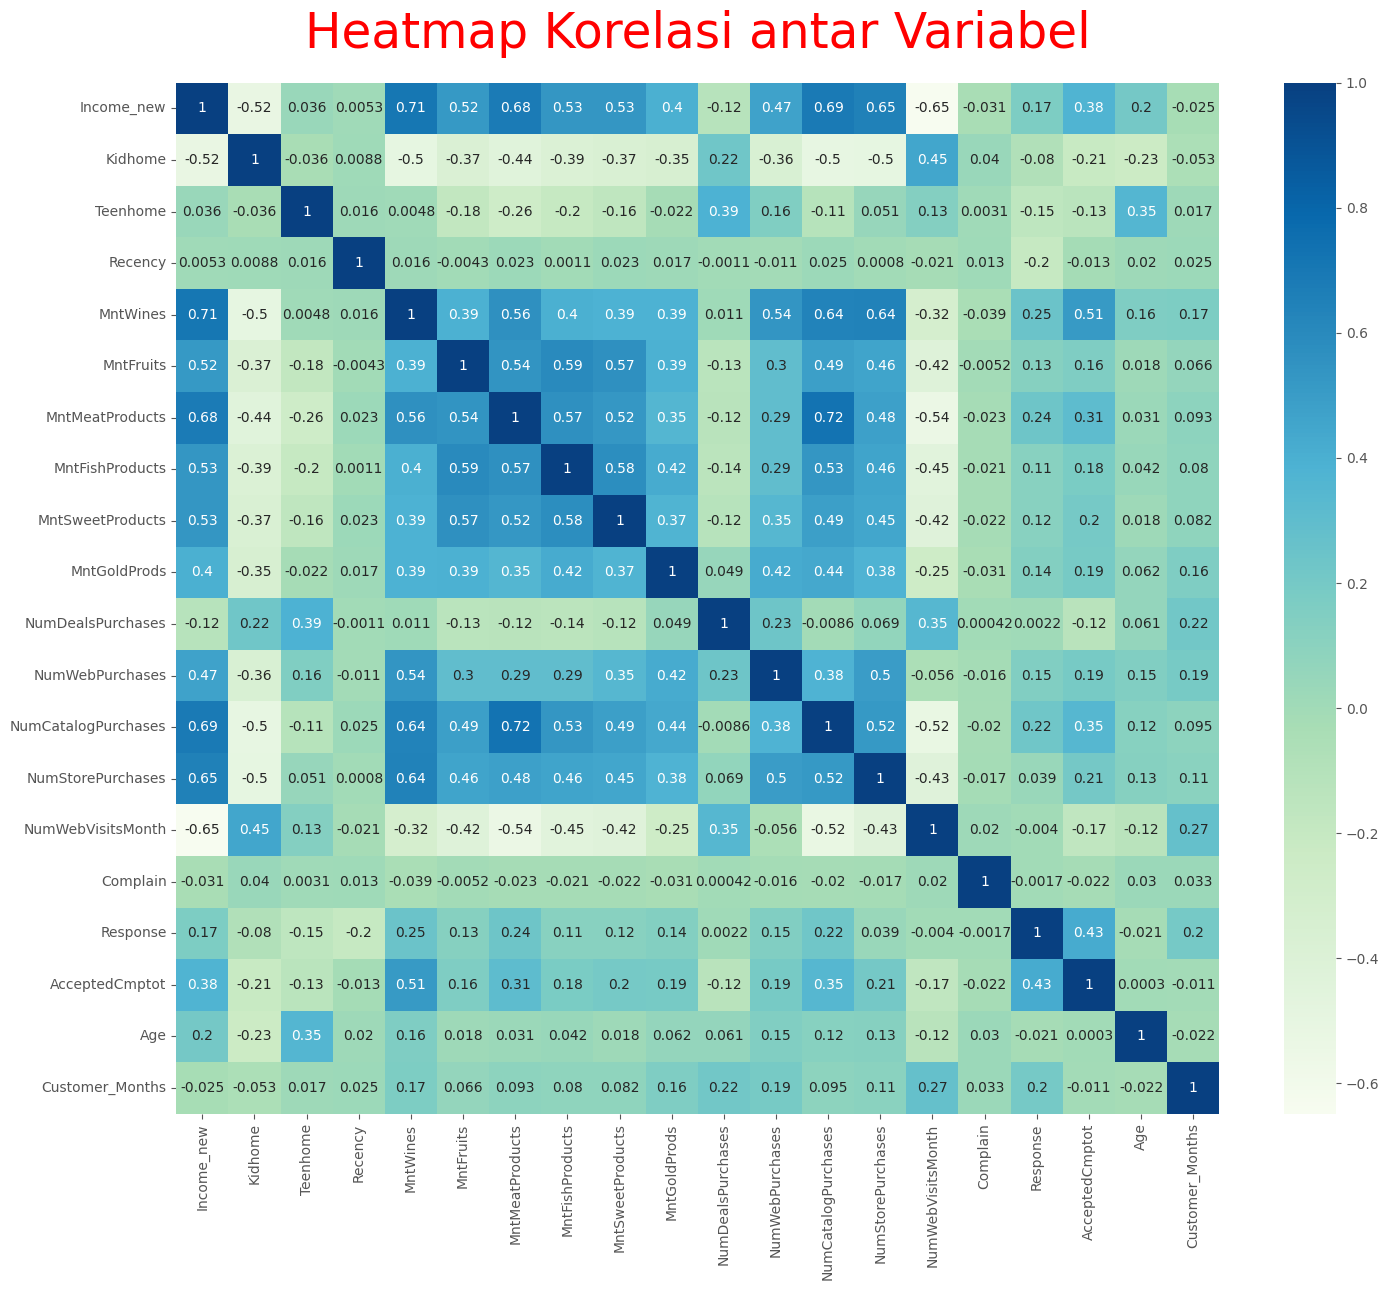

In [33]:
#heatmap korelasi masing-masing variabelnya
plt.figure(figsize=(15,13))
#sns.set_theme('notebook', style='white')
plt.style.use('ggplot')
sns.heatmap(df[['Income_new', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'AcceptedCmptot',
                   'Age', 'Customer_Months']].corr(), annot=True, cmap ='GnBu')
plt.title('Heatmap Korelasi antar Variabel', fontsize = 35, pad = 25, color = 'r')
plt.tight_layout()
plt.show()

*   Korelasi antara jumlah anak kecil dalam rumah tangga cukup besar, namun berbanding terbalik dengan jumlah pendapatan. Maka, **semakin tinggi pendapatan, semakin kecil sedikit juga jumlah anak kecil yang dimiliki**.
*   Variabel lain yang memiliki korelasi yang cukup tinggi dengan pendapatan ialah jumlah konsumsi semua produk, serta jumlah pembelian melalui web, catalog, dan toko.
*   Dapat diketahui pula jika variabel umur memiliki korelasi positif dengan pendapatan, namun tidak signifikan. Sehingga dapat disimpulkan, bahwa** semakin tinggi pendapatan kustomer 'umumnya' semakin tua juga umurnya.**
*   Pembelian melalui toko dengan katalog memiliki korelasi yang cukup besar dan berbanding lurus dengan pembelian produk. Berbeda dengan pembelian melalui website yang berbanding terbalik, sehingga **umumnya kustomer membeli produk melalui toko dan katalog.**
*   Jumlah pembelian wine dengan jumlah iklan yang diterima (accepted campaign) cukup besar dan berbanding lurus, dari hal tersebut dapat diketahui bahwa **umumnya kustomer membeli wine karena tergiur oleh iklan.** hmm... 🤔









<b> rfm metrics </b>

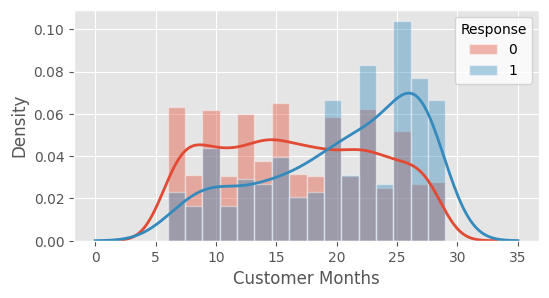

In [34]:
f,ax = plt.subplots(figsize=(6,3))
plt.style.use('default')
response_cat = [0,1]
for i in response_cat:
  subset = df[df['Response'] == i]
  sns.distplot(subset['Customer_Months'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
               hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
#plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Customer Months')
plt.ylabel('Density')
plt.show()

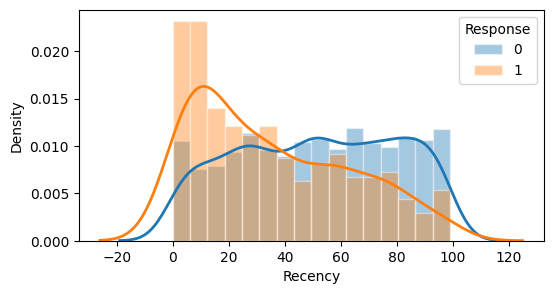

In [35]:
f,ax = plt.subplots(figsize=(6,3))
plt.style.use('default')
response_cat = [0,1]
for i in response_cat:
  subset = df[df['Response'] == i]
  sns.distplot(subset['Recency'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
               hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
#plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

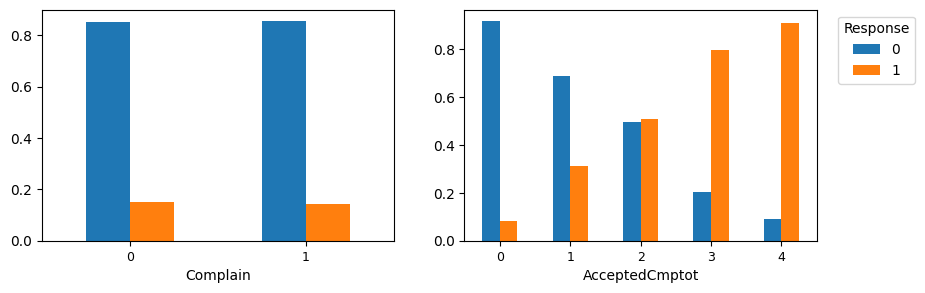

In [36]:
bycomplain = df.groupby('Complain').Response.value_counts(normalize=True)
bycampaign = df.groupby('AcceptedCmptot').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.style.use('default')
g1 = bycomplain.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = bycampaign.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

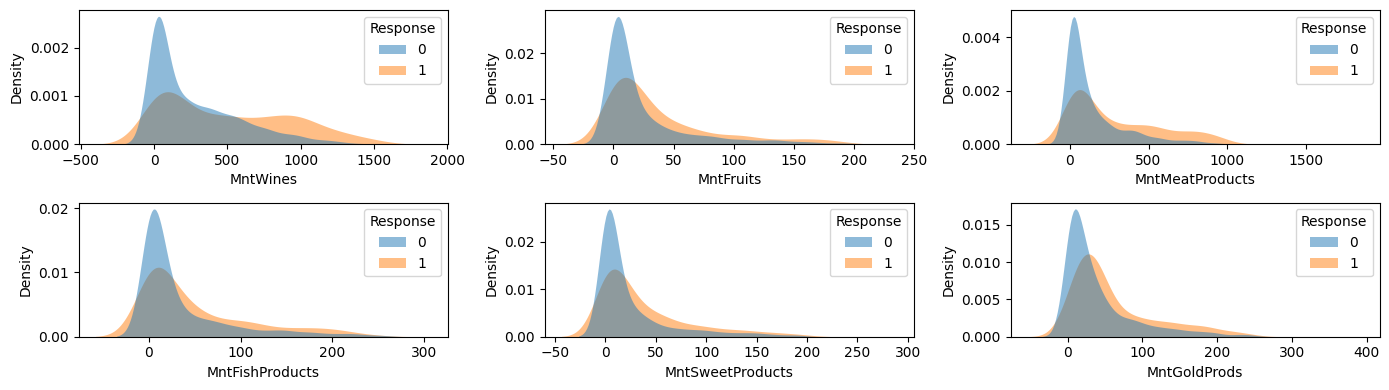

In [37]:
fig = plt.figure(figsize=(14, 4))
plt.style.use('default')
for i in range(0, len(spent)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.kdeplot(ax=ax, data=df, x=spent[i], hue='Response', fill=True, common_norm=False, alpha=.5, linewidth=0)
    #plt.xticks(fontsize=10)
    plt.tight_layout()

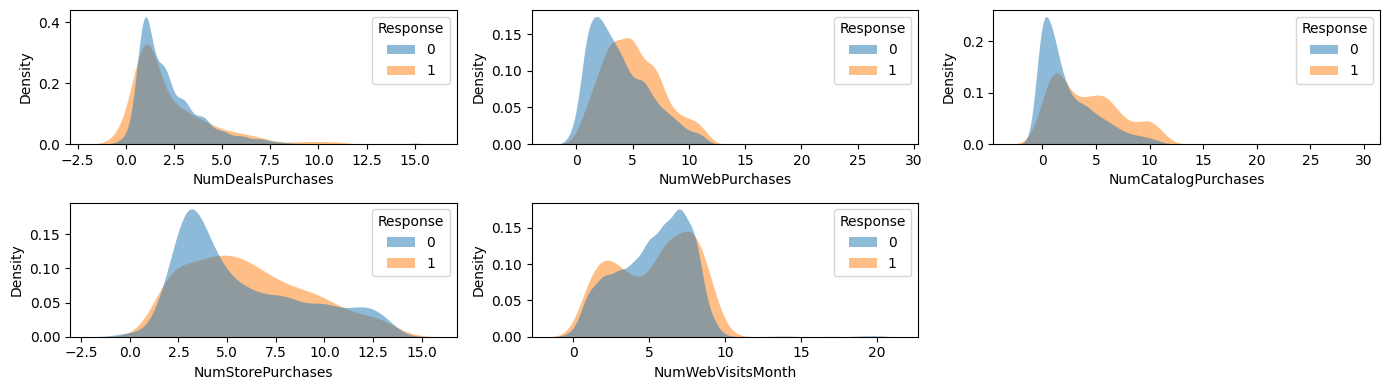

In [38]:
fig = plt.figure(figsize=(14, 4))
plt.style.use('default')
for i in range(0, len(purchase)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.kdeplot(ax=ax, data=df, x=purchase[i], hue='Response', fill=True, common_norm=False, alpha=.5, linewidth=0)
    #plt.xticks(fontsize=10)
    plt.tight_layout()

### Hubungan antar variabel

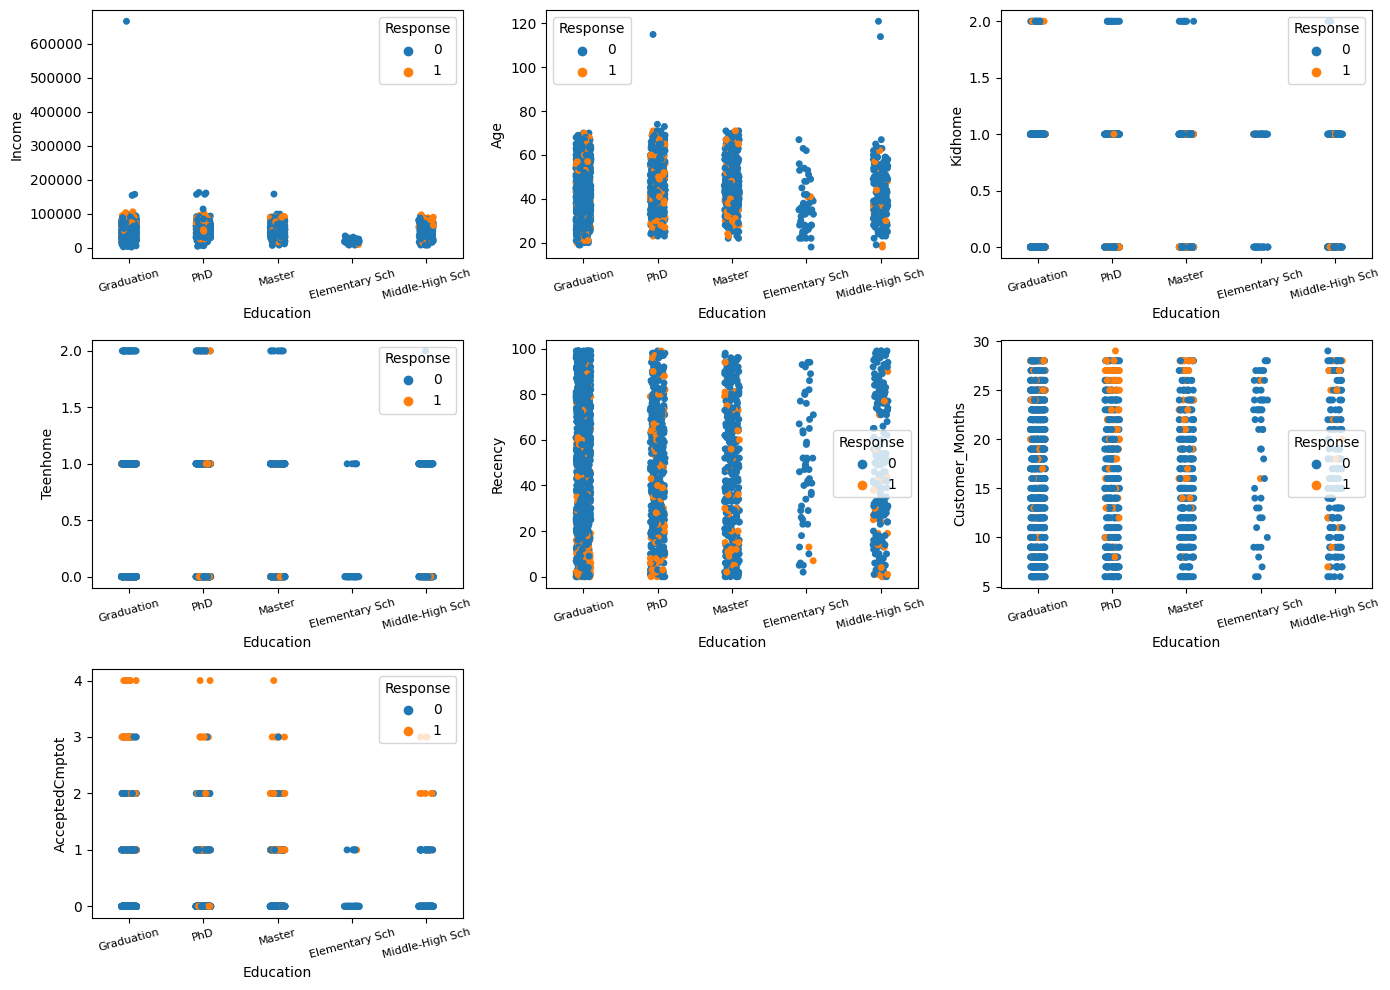

In [39]:
fig = plt.figure(figsize=(14, 10))
plt.style.use('default')
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

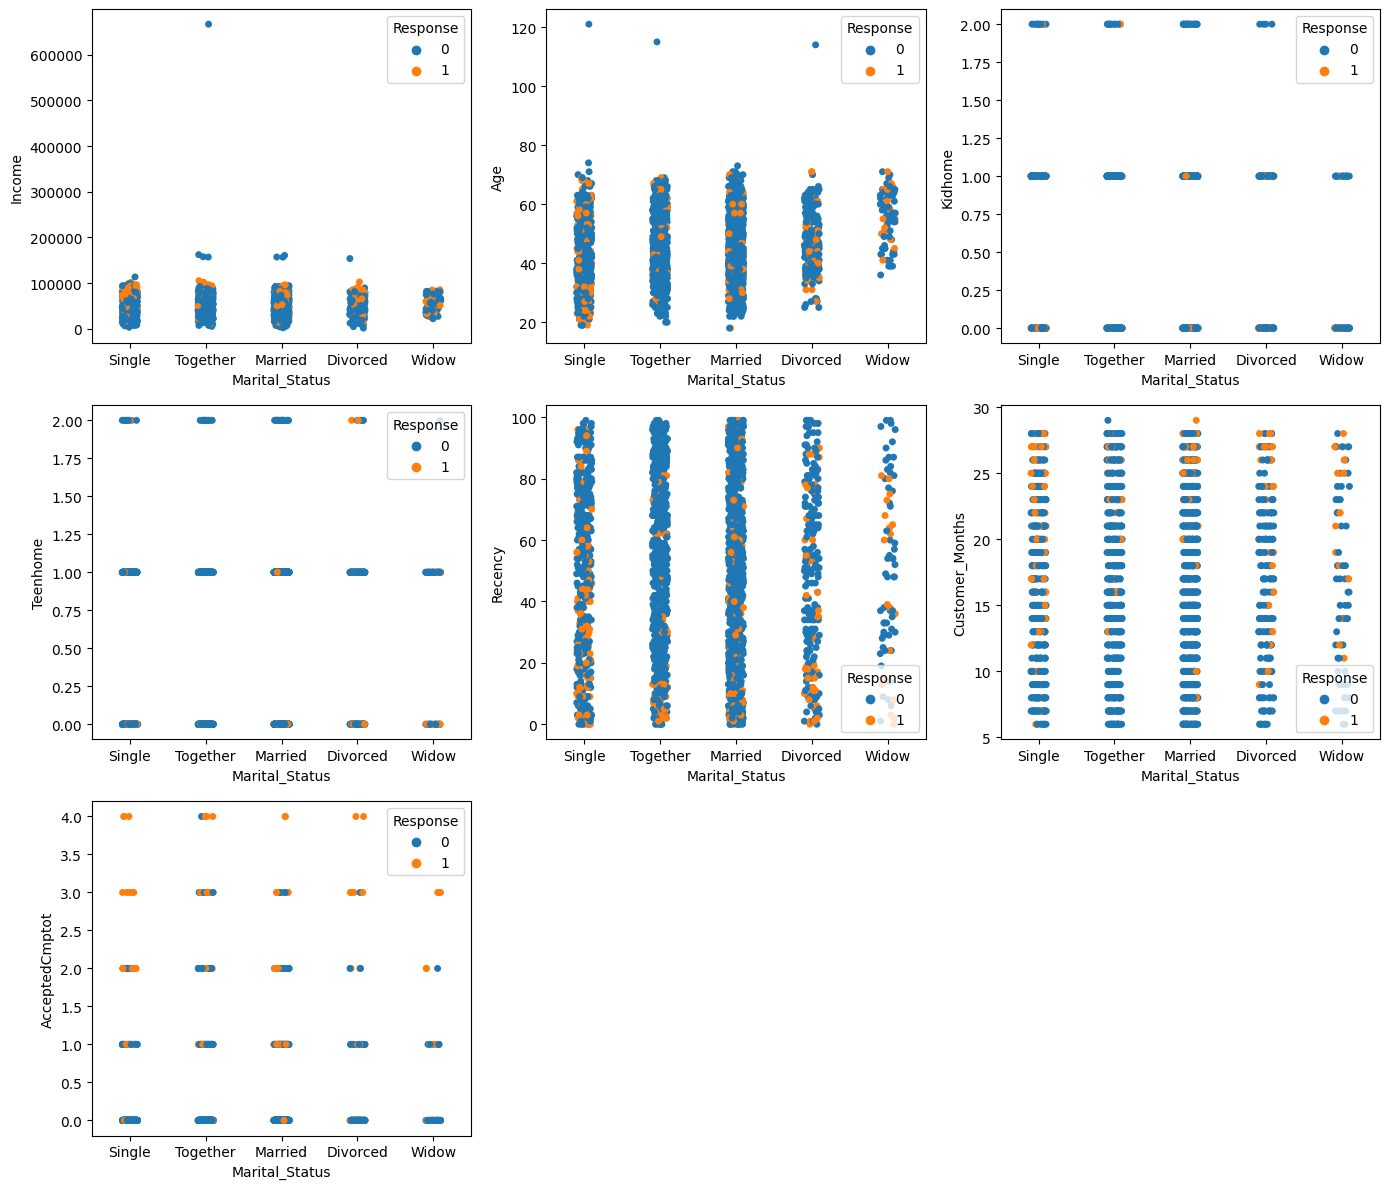

In [40]:
fig = plt.figure(figsize=(14, 12))
plt.style.use('default')
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(fontsize=10)
    plt.tight_layout()

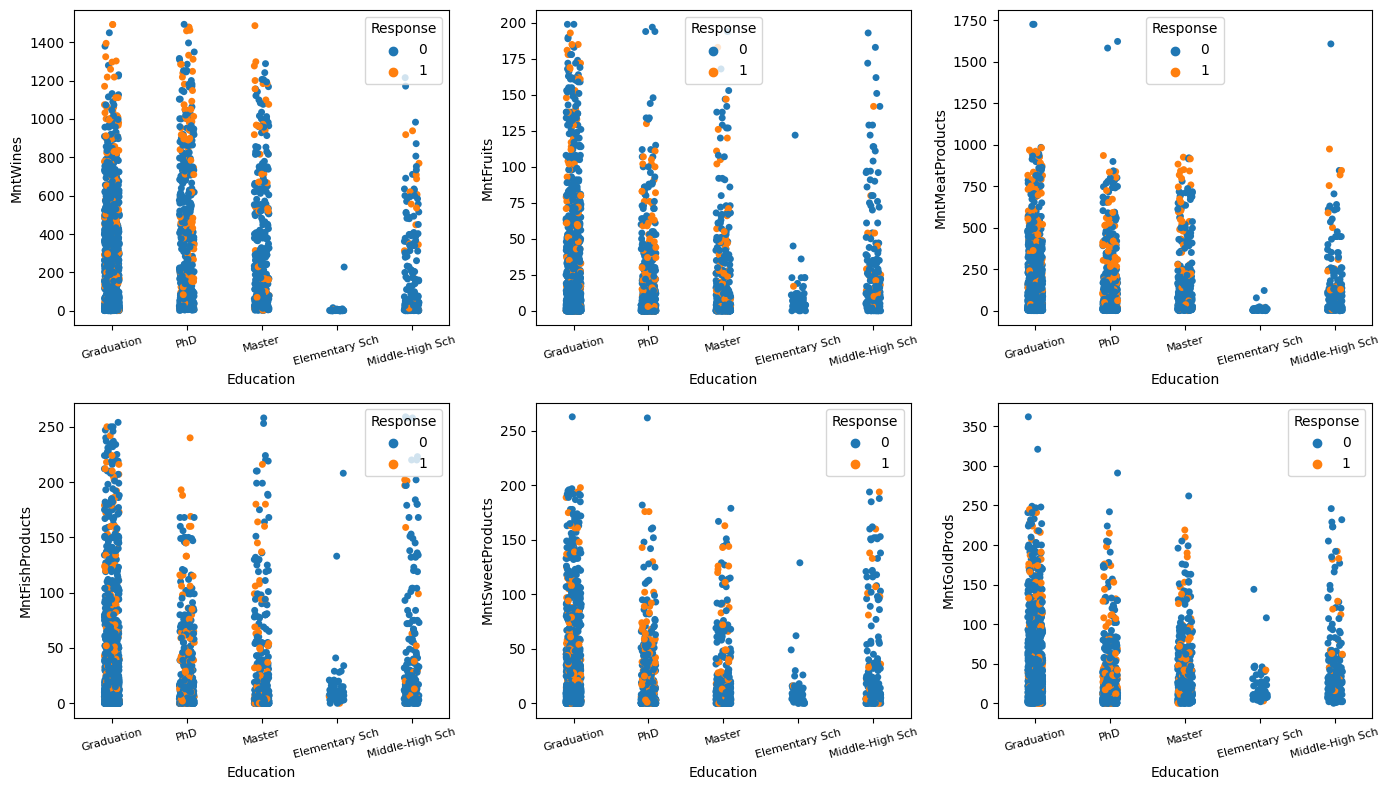

In [41]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

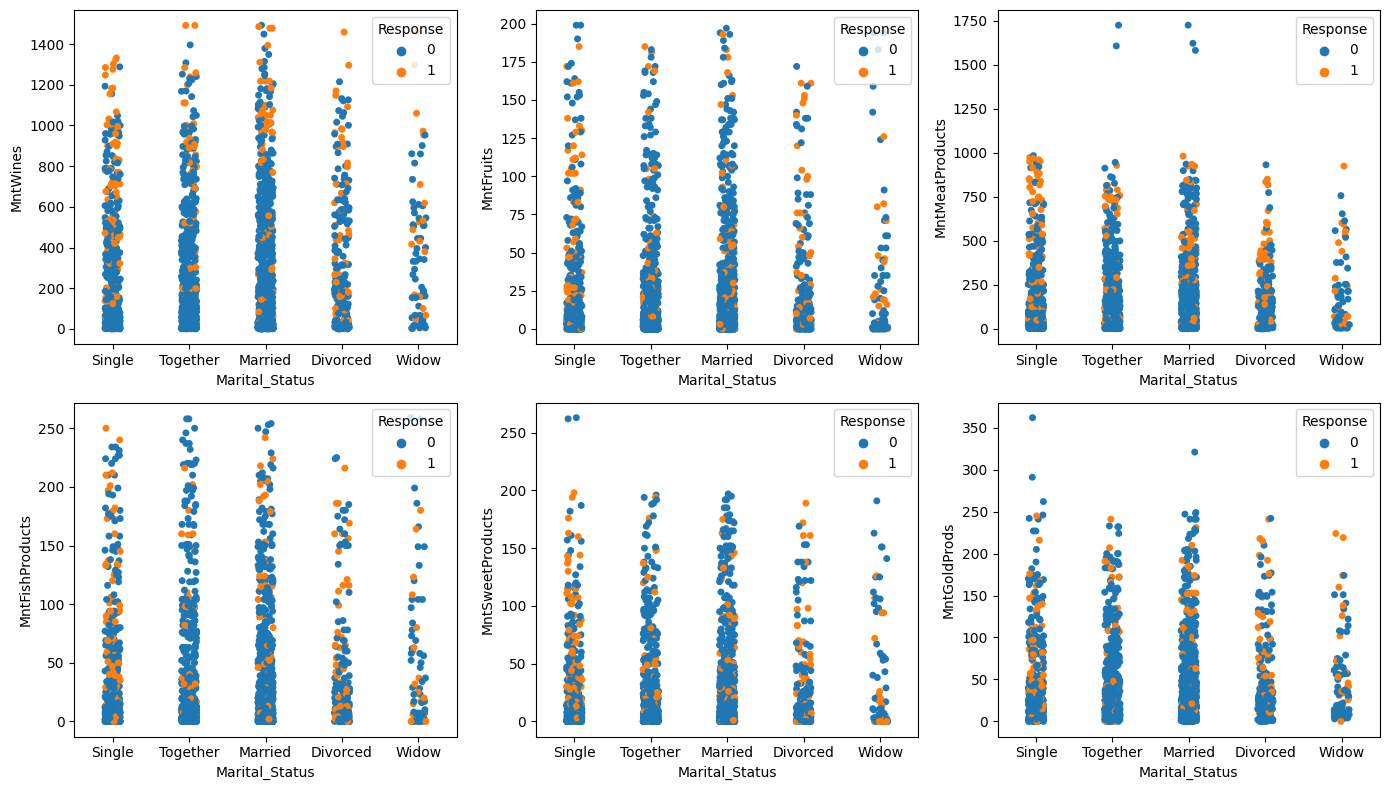

In [42]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

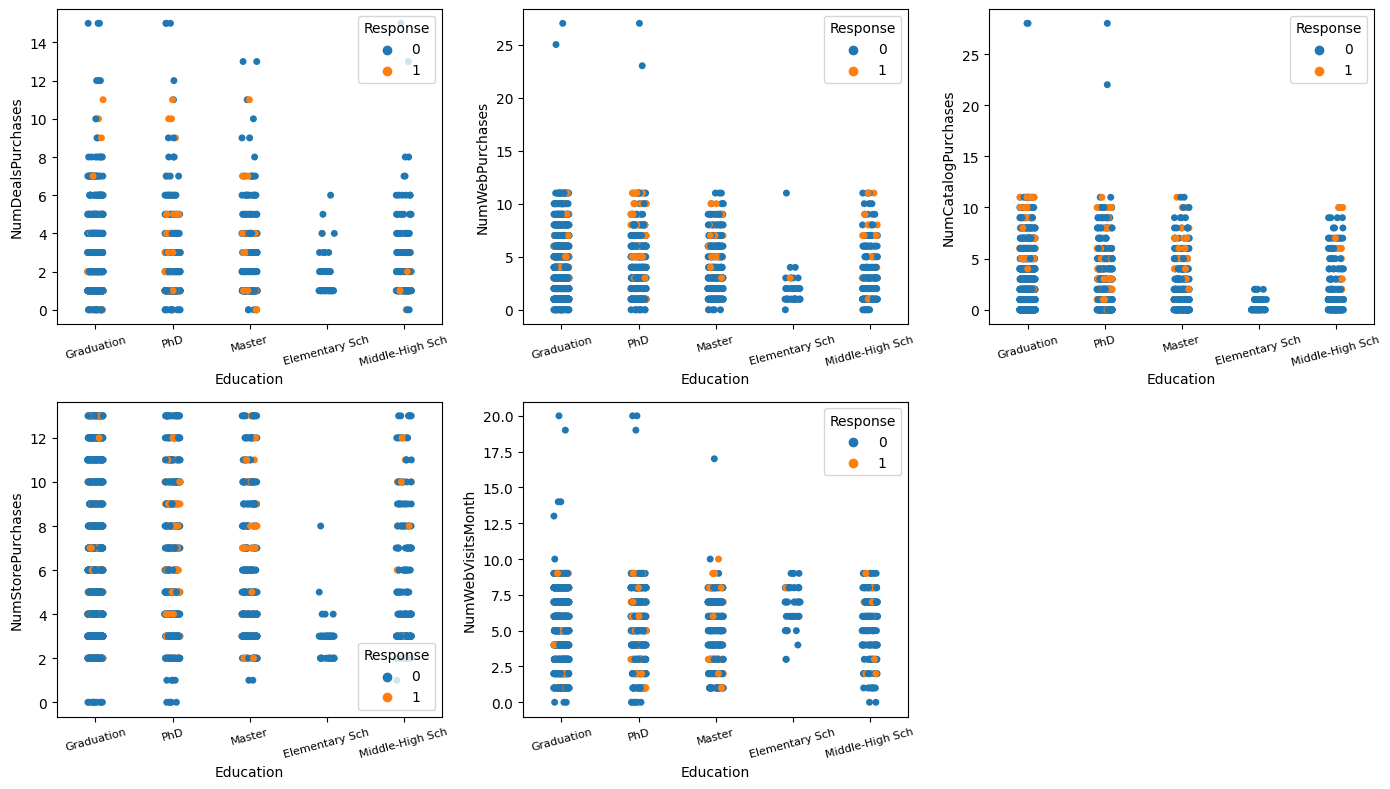

In [43]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

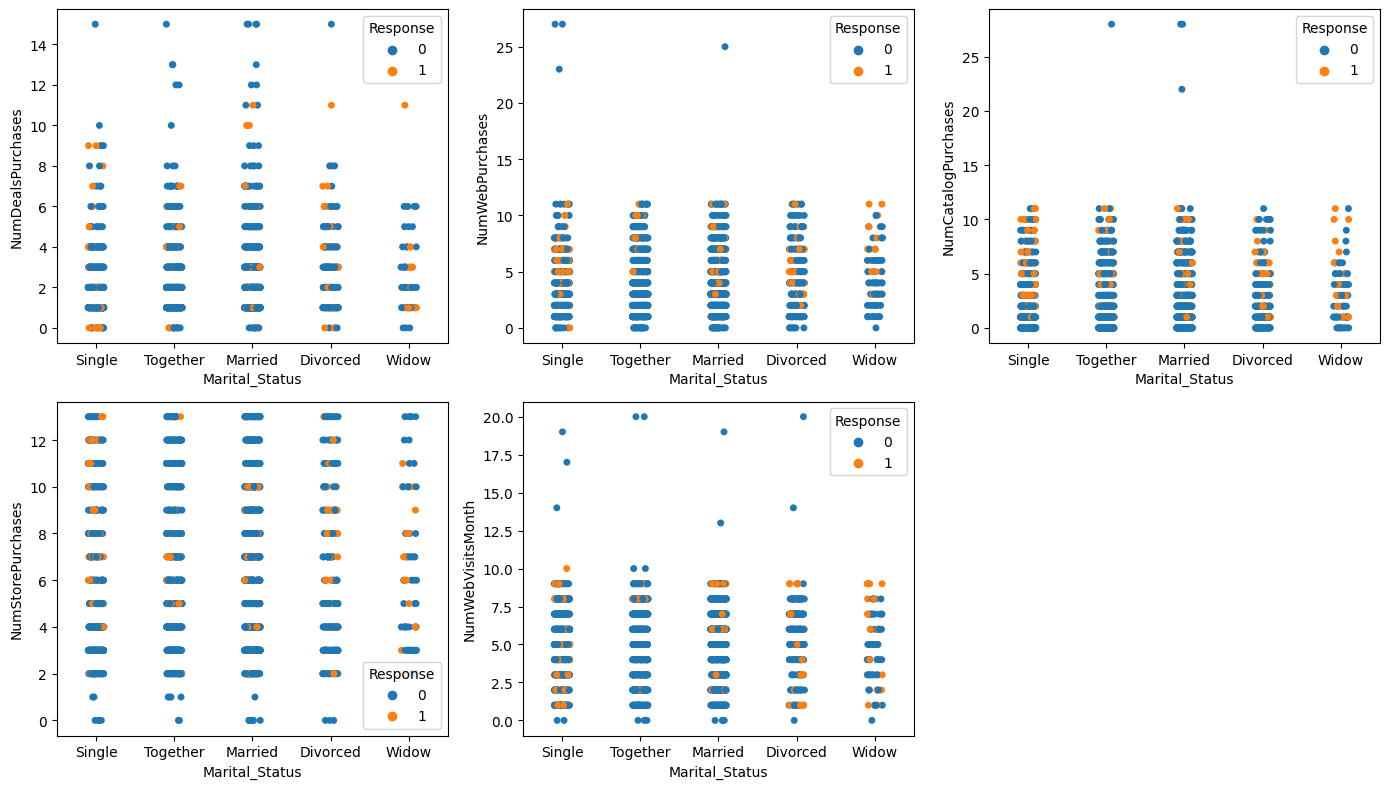

In [44]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

## Business Insight

In [45]:
# bisnis insight : segmentasi target
# Pie Chart berdasarkan setiap kategori yang ditinjau dengan value masing-masing berdasarkan income customer
# Will be better if we can just make "Single, Divorced and Widowed as alone" and "Married and Together as In_Couple"
# Maybe we can segmentate age as Elder, Adult or Millenial
import plotly.express as px
fig = px.sunburst(df, path=['Response','Marital_Status', 'Education'], values='Income_new')
fig.show()

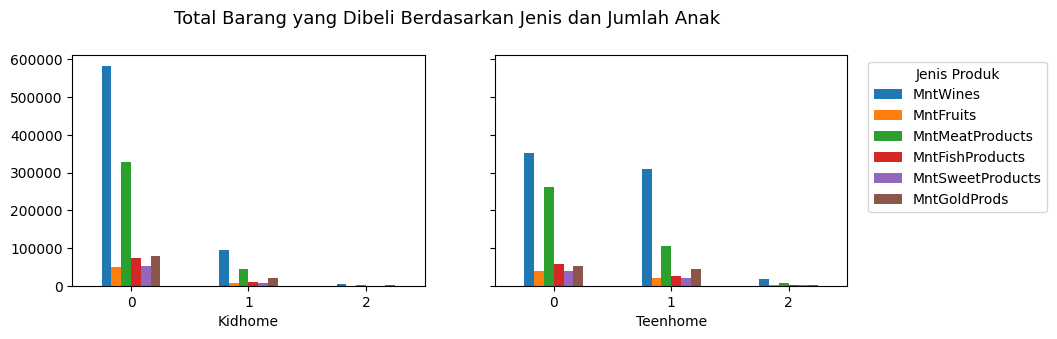

In [46]:
# Bussiness Insight : Hubungan Antara Jumlah Anak (Anak Kecil dan Remaja) dan Pengeluaran
kidhome = df.groupby('Kidhome')[spent].sum()
teenhome = df.groupby('Teenhome')[spent].sum()
fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey = True)
g1 = kidhome.plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = teenhome.plot(ax = axes[1] ,kind ='bar')
fig.suptitle("Total Barang yang Dibeli Berdasarkan Jenis dan Jumlah Anak", fontsize=13, y=1.03)
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
plt.legend(title='Jenis Produk', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

Dapat dilihat bahwa jumlah anak cukup mempengaruhi pengeluaran secara signifikan, akan tetapi ini masih dari jumlah anak yang dibawah usia remaja, bagaimana dengan anak anak yang berusia remaja ?

Ternyata jumlah dari pengeluaran juga tetap menurun akan tetapi jika dilihat lagi selisih dari mereka yang tidak memiliki anak kecil dengan yang memiliki 1 anak kecil cukup drastis jika dibandingkan dengan mereka yang tidak memiliki anak remaja dan memiliki 1 anak remaja.

Hal ini kemudian dapat dibandingkan lagi antara total transaksi dan jenis transaksi yang terjadi melalui platform apa bagi mereka yang memiliki anak kecil dan anak remaja

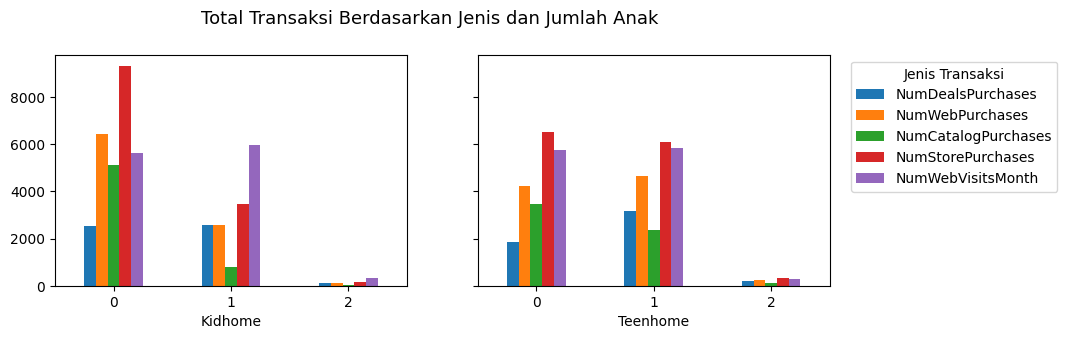

In [47]:
# Bussiness Insight : Hubungan Antara Jumlah Anak (Anak Kecil dan Remaja) dan Jenis Transaksi
kidhomes = df.groupby('Kidhome')[purchase].sum()
teenhomes = df.groupby('Teenhome')[purchase].sum()
fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey = True)
g1 = kidhomes.plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = teenhomes.plot(ax = axes[1] ,kind ='bar')
fig.suptitle("Total Transaksi Berdasarkan Jenis dan Jumlah Anak", fontsize=13, y=1.03)
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
plt.legend(title='Jenis Transaksi', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

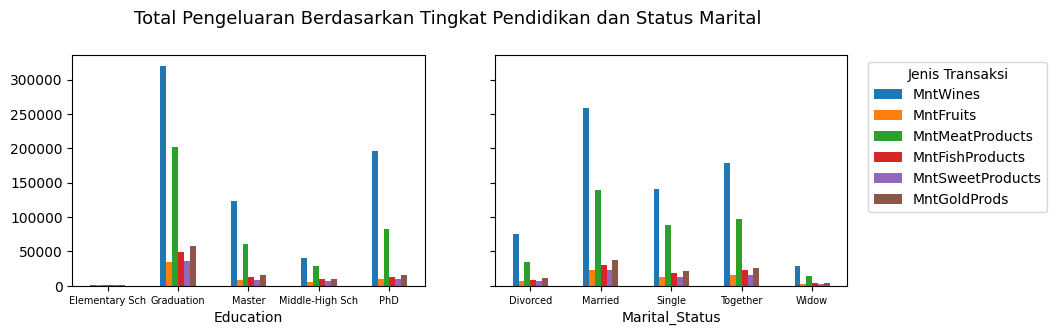

In [48]:
# Business insight untuk Total Pengeluaran Berdasarkan Tingkat Pendapatan Dan Jenis-Jenis Produk
# Business insight untuk melihat pengeluaran apa yang terbesar berdasarkan status customer
total_spending = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
total_spending2 = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey = True)
g1 = total_spending.plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = total_spending2.plot(ax = axes[1] ,kind ='bar')
fig.suptitle("Total Pengeluaran Berdasarkan Tingkat Pendidikan dan Status Marital", fontsize=13, y=1.03)
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=7)
plt.legend(title='Jenis Transaksi', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

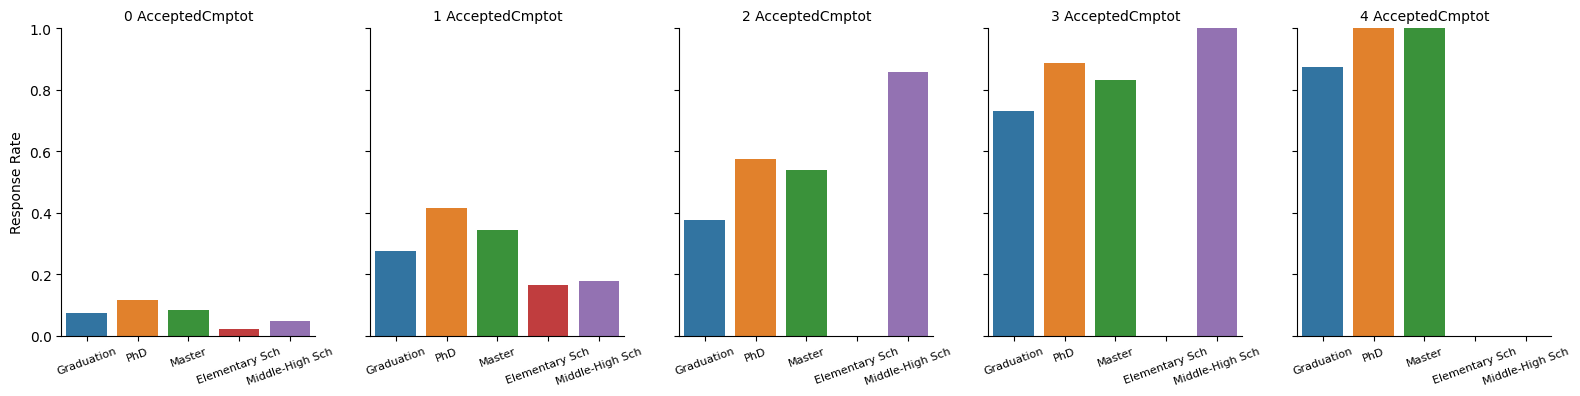

In [49]:
plt.style.use('default')
g = sns.catplot(data=df, x="Education", y="Response", col="AcceptedCmptot",kind="bar", height=4, aspect=.8, ci=None)
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize': 8}, rotation = 20 )
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
plt.show()

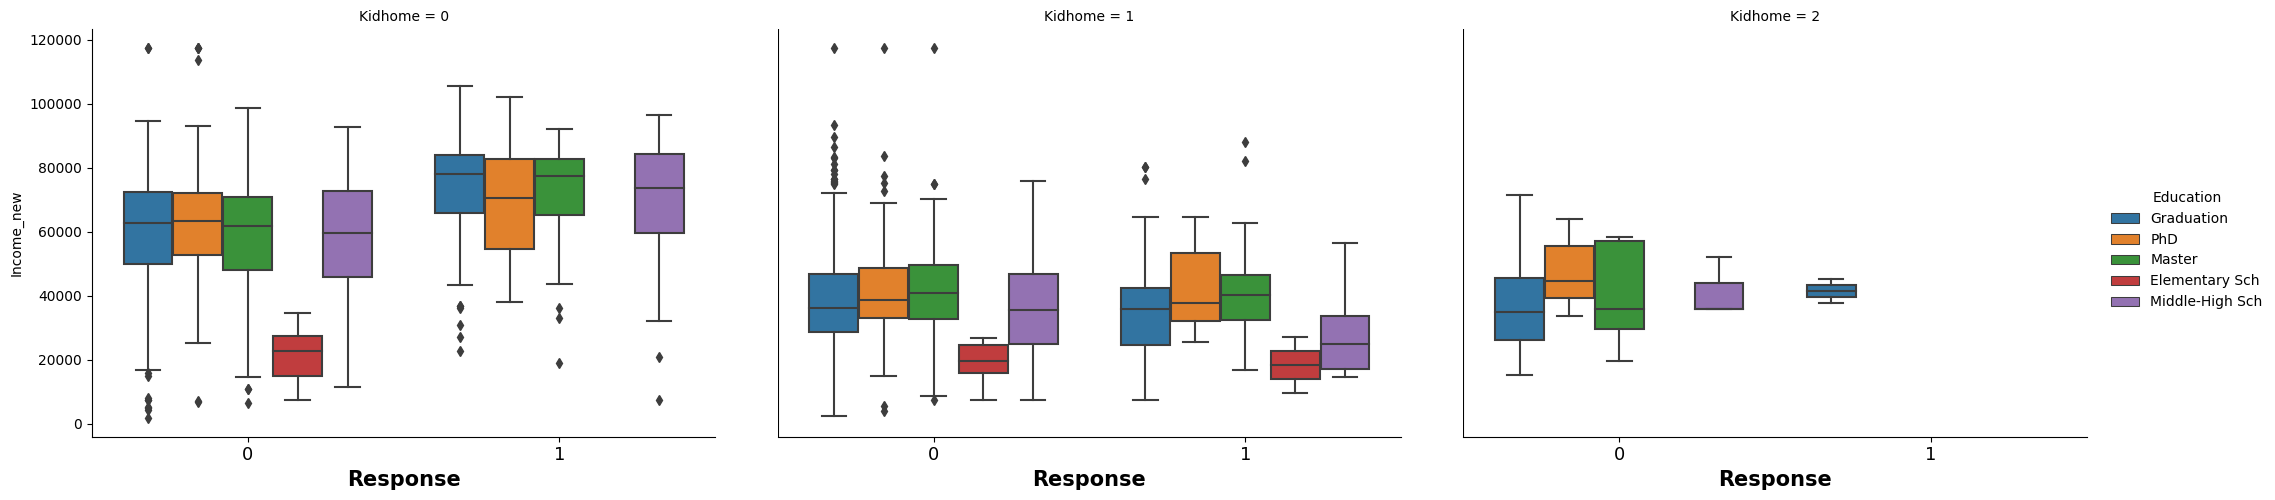

In [50]:
plt.style.use('default')
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Kidhome', hue='Education', height=5, aspect=11.7/8.27)
g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(fontdict= {'fontsize': 13} )
g.set_xlabels(fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

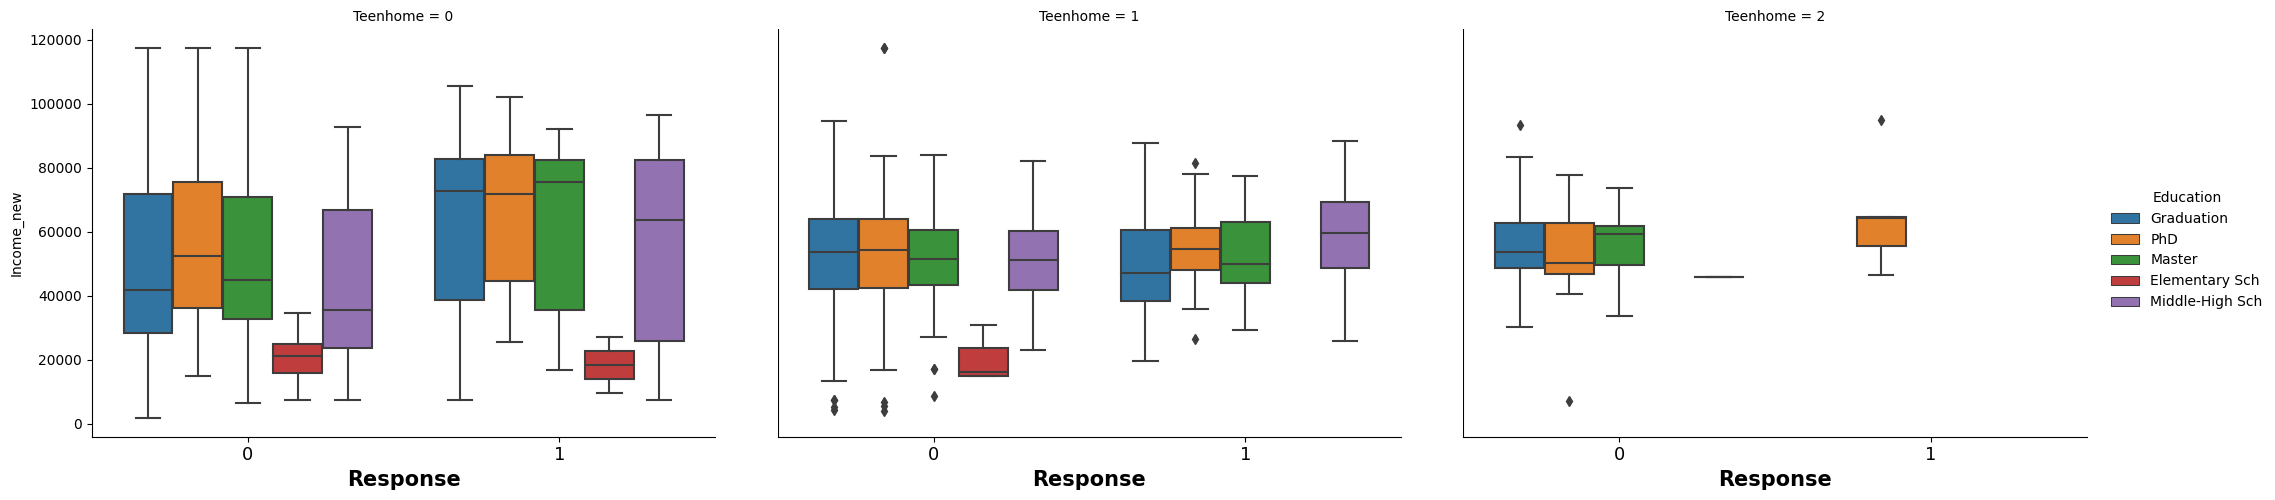

In [51]:
plt.style.use('default')
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Teenhome', hue='Education', height=5, aspect=11.7/8.27)
g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(fontdict= {'fontsize': 13} )
g.set_xlabels(fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

# DATA PREPROCESSING - STAGE 2

## Data Cleaning

*   Handle missing values = dilakukan imputasi missing value pada variabel income dengan median
*   Handle duplicated data = tidak terdapat data yang duplikat
*   Handle outliers = dilakukan penanganan outlier pada income menggunakan iqr
*   Feature transformation = dilakukan standarisasi pada semua variabel numerik
*   Feature encoding pada education dan marital_status
*   Handle class imbalance

## Feature Engineering

* 2A. Feature selection (membuang feature yang kurang relevan atau redundan)
* 2B. Feature extraction (membuat feature baru dari feature yang sudah ada)
* 2C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

In [52]:
# missing value 
# sudah dilakukan pada stage 1 yaitu menangani missing value pada income dengan median

In [53]:
# duplicated data
# tidak ada data yang duplikat
df.duplicated(subset=['ID']).sum()

0

In [54]:
# feature extraction - POIN 2B
# dilakukan penggabungan variabel AcceptedCmp1 sampai AcceptedCmp5 menjadi AcceptedCmptot pada stage 1
# membuat fitur baru yaitu jumlah anggota keluarga
df['ParentSize'] = np.where((df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Widow'), 1,2)
df['HouseholdSize'] = df['Kidhome'] + df['Teenhome'] + df['ParentSize']

In [55]:
# feature extraction
# membuat fitur age menjadi data kategorikal karena terlihat dari hasil eda bahwa tidak ada perbedaan age pada response no dan yes

def age_category(Age):
    if Age >= 18 and Age <= 20:
        kategori = "Teenager"
    elif Age >= 21 and Age <= 60:
        kategori = "Adult"
    else:
        kategori = "Elderly"
    return kategori

df['Age_Category'] = df.apply(lambda x: age_category(x['Age']), axis=1)
pd.set_option('display.max_columns', None)

In [56]:
print(df['Age_Category'].value_counts())

Adult       1961
Elderly      269
Teenager      10
Name: Age_Category, dtype: int64


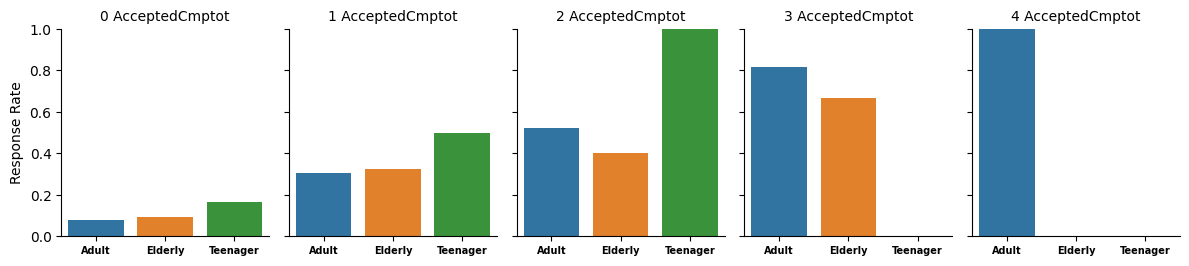

In [57]:
plt.style.use('default')
g = sns.catplot(data=df, x="Age_Category", y="Response", col="AcceptedCmptot",kind="bar", height=3, aspect=.8, ci=None)
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize':7,'fontweight': 'bold'} )
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
plt.show()

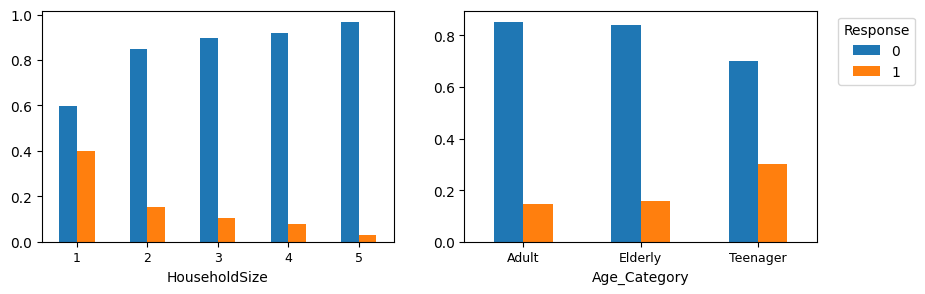

In [58]:
byhhsize = df.groupby('HouseholdSize').Response.value_counts(normalize=True)
byagecat = df.groupby('Age_Category').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = byhhsize.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byagecat.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [59]:
# feature selection - remove variabel yang tidak digunakan
df_new = df.drop(columns=['ID','Year_Birth', 'Dt_Customer', 'Z_CostContact', 
                          'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                          'AcceptedCmp4', 'AcceptedCmp5', 'ParentSize', 'Income_new']).copy()
df_new.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'AcceptedCmptot', 'Age', 'Customer_Months', 'HouseholdSize',
       'Age_Category'],
      dtype='object')

In [60]:
X = df_new.drop(columns=['Response'], axis=1)
y = df_new[['Response']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(1568, 23)
(1568, 1)

(672, 23)
(672, 1)


In [62]:
low, high = outlier(X_train['Income'])

#replacing outlier with upper bound and lower bound value
X_train['Income'] = np.where(X_train['Income']>high, high, X_train['Income'])
X_train['Income'] = np.where(X_train['Income']<low, low, X_train['Income'])
X_test['Income'] = np.where(X_test['Income']>high, high, X_test['Income'])
X_test['Income'] = np.where(X_test['Income']<low, low, X_test['Income'])

In [63]:
# feature encoding pada education dan marital status
# label encoder pada Education
X_train['Education'] = X_train['Education'].astype('category').cat.codes
X_train['Age_Category'] = X_train['Age_Category'].astype('category').cat.codes
X_test['Education'] = X_test['Education'].astype('category').cat.codes
X_test['Age_Category'] = X_test['Age_Category'].astype('category').cat.codes

# one hot encoding pada marital status karena tidak memiliki urutan
status_x_train = pd.get_dummies(X_train['Marital_Status'], prefix='Status')
X_train = X_train.join(status_x_train)
status_x_test = pd.get_dummies(X_test['Marital_Status'], prefix='Status')
X_test = X_test.join(status_x_test)

In [64]:
print(X_train.columns)
print(y_train.columns)
print('')
print(X_test.columns)
print(y_test.columns)

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'AcceptedCmptot',
       'Age', 'Customer_Months', 'HouseholdSize', 'Age_Category',
       'Status_Divorced', 'Status_Married', 'Status_Single', 'Status_Together',
       'Status_Widow'],
      dtype='object')
Index(['Response'], dtype='object')

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'AcceptedCmptot',
       'Age', 'Customer_Months', 'HouseholdSize', 'Age_Category',
       'Status_Di

In [65]:
X_train

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
994           1       Divorced  64587.0        1         1       49        66   
2162          1       Together  47320.0        0         1       10       200   
906           1         Single  86429.0        0         0       10       464   
572           3         Single  38593.0        1         0       42        51   
1877          1        Married  72905.0        0         0       52       407   
...         ...            ...      ...      ...       ...      ...       ...   
1638          1        Married  44078.0        1         1       17        24   
1095          1         Single  61825.0        0         1       56       162   
1130          2        Married  67381.0        0         1       67       815   
1294          4         Single  48918.0        1         1       21        52   
860           1       Together  23228.0        1         0       71        13   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
994           0               16                0                 6   
2162         19              111               50                15   
906          28              873               29                18   
572          12               49               17                24   
1877        114              445              181               165   
...         ...              ...              ...               ...   
1638          1               10                2                 0   
1095         50              100               55                30   
1130          8               53               11                 0   
1294          0                9                0                 0   
860           2               18                6                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
994             20                  2                1                    1   
2162            19                  6                5                    1   
906             37                  0                7                    4   
572             24                  3                4                    1   
1877           203                  1                3                    7   
...            ...                ...              ...                  ...   
1638             4                  2                2                    0   
1095            27                  1                4                    2   
1130            70                  4                2                    2   
1294             1                  2                1                    0   
860              0                  2                2                    0   

      NumStorePurchases  NumWebVisitsMonth  Complain  AcceptedCmptot  Age  \
994                   4                  3         0               0   60   
2162                  8                  6         0               0   57   
906                   7                  2         0               1   53   
572                   3                  8         0               0   36   
1877                  9                  1         0               1   56   
...                 ...                ...       ...             ...  ...   
1638                  3                  5         0               0   45   
1095                  8                  4         0               0   35   
1130                  9                  7         0               1   63   
1294                  4                  4         0               0   51   
860                   3                  8         0               0   45   

      Customer_Months  HouseholdSize  Age_Category  Status_Divorced  \
994                 6              3             0                1   
2162               16              3             0                0   
906                13              1             0                0   
572                15 

In [66]:
X_test

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
324           1         Single  40464.0        0         1       78       424   
96            1          Widow  47916.0        0         1       72       505   
2104          0        Married  14188.0        0         0       40         2   
1259          1       Together  76653.0        0         0       91       736   
1061          1       Together  65196.0        0         2       34       743   
...         ...            ...      ...      ...       ...      ...       ...   
2064          1        Married  67445.0        0         1       63       757   
1735          1       Divorced  70044.0        0         1       46      1073   
1057          4        Married  53312.0        0         0       32       241   
1461          1       Together  57957.0        0         1       24       290   
1175          2        Married  47353.0        0         1       93       184   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
324          17              118                7                23   
96            0               26                0                 0   
2104          7               11               16                12   
1259         63              946              219               189   
1061         19              181               12                 0   
...         ...              ...              ...               ...   
2064         80              217               29                80   
1735          0              250              153                14   
1057          0               12                0                 0   
1461         59              177               77                 5   
1175          2               19                8                 8   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
324             41                  6                8                    2   
96              75                  5                7                    4   
2104            27                  1                2                    0   
1259           126                  1                4                    7   
1061           200                  2                7                    6   
...            ...                ...              ...                  ...   
2064            11                  5                9                    6   
1735            14                  4                7                   10   
1057            25                  1                5                    1   
1461            29                  7                4                    6   
1175             4                  3                2                    2   

      NumStorePurchases  NumWebVisitsMonth  Complain  AcceptedCmptot  Age  \
324                   8                  8         0               0   61   
96                    6                  6         0               1   54   
2104                  4                  6         0               0   42   
1259                 11                  2         0               2   45   
1061                 11                  5         0               1   56   
...                 ...                ...       ...             ...  ...   
2064                 12                  6         0               0   40   
1735                  5                  5         0               0   60   
1057                  5                  7         0               0   63   
1461                  8                  3         1               0   55   
1175                  6                  5         0               0   54   

      Customer_Months  HouseholdSize  Age_Category  Status_Divorced  \
324                23              2             1                0   
96                 25              2             0                0   
2104               22              2             0                0   
1259               16 

In [67]:
X_train = X_train.drop(columns=['Marital_Status', 'Age']).copy()
X_test = X_test.drop(columns=['Marital_Status', 'Age']).copy()

In [68]:
demographic2 = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot', 'HouseholdSize' ]

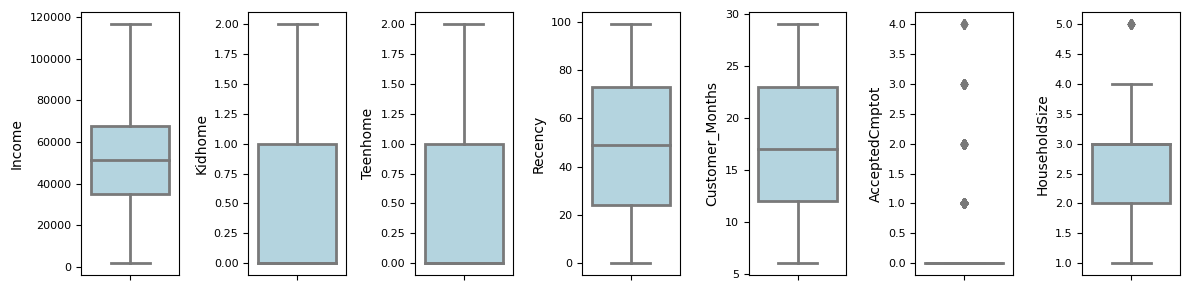

In [69]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic2)):
    plt.subplot(1, len(demographic2), i+1)
    sns.boxplot(y=X_train[demographic2[i]], color='lightblue', orient='v')
    plt.tight_layout()

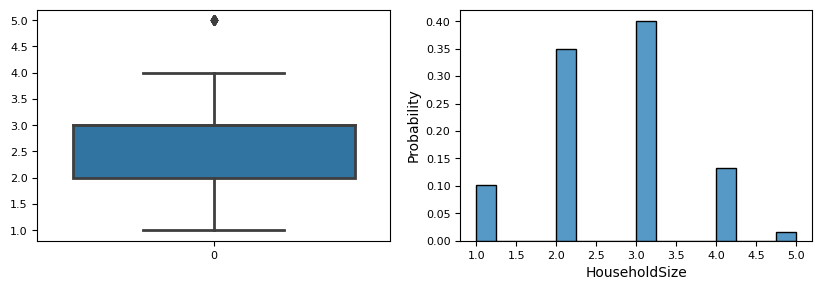

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
sns.boxplot(ax=axes[0], data = X_train['HouseholdSize'])
sns.histplot(ax=axes[1], data = X_train, x = "HouseholdSize", stat = "probability", bins=int(80/5))
plt.show()

In [71]:
nums = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot', 'HouseholdSize',
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']

In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for n in nums:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

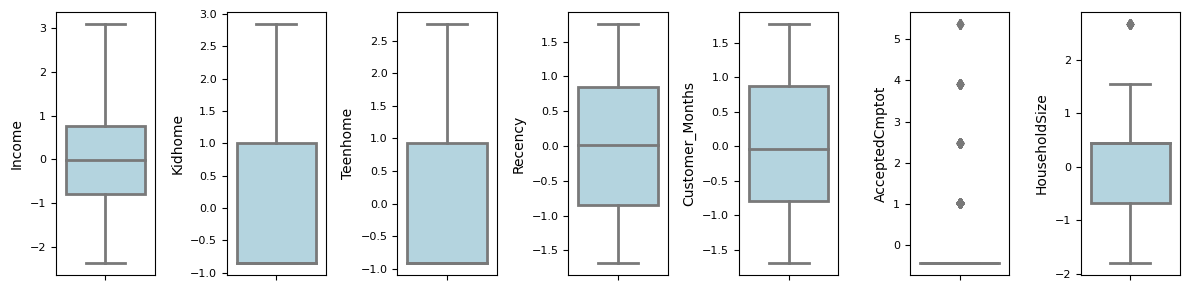

In [73]:
# visualisasi setelah scaling data
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic2)):
    plt.subplot(1, len(demographic2), i+1)
    sns.boxplot(y=X_train[demographic2[i]], color='lightblue', orient='v')
    plt.tight_layout()

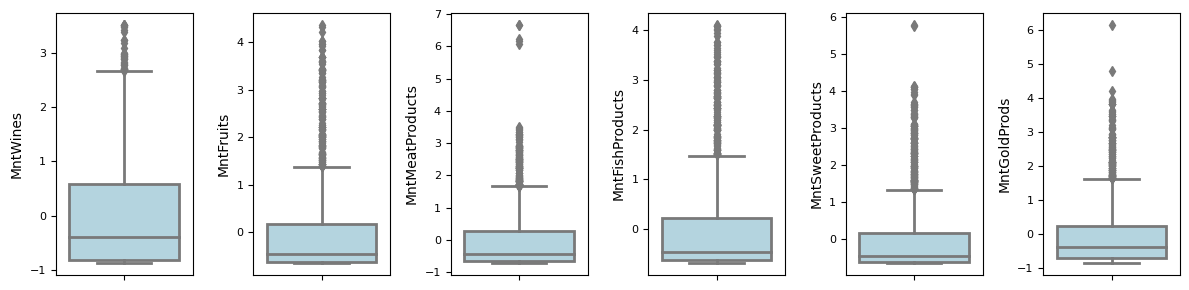

In [74]:
for i in range(0, len(spent)):
    plt.subplot(1, len(spent), i+1)
    sns.boxplot(y=X_train[spent[i]], color='lightblue', orient='v')
    plt.tight_layout()

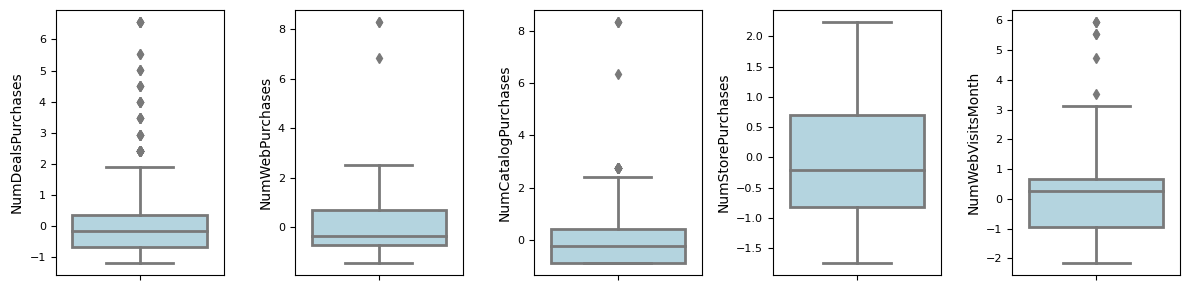

In [75]:
for i in range(0, len(purchase)):
    plt.subplot(1, len(purchase), i+1)
    sns.boxplot(y=X_train[purchase[i]], color='lightblue', orient='v')
    plt.tight_layout()

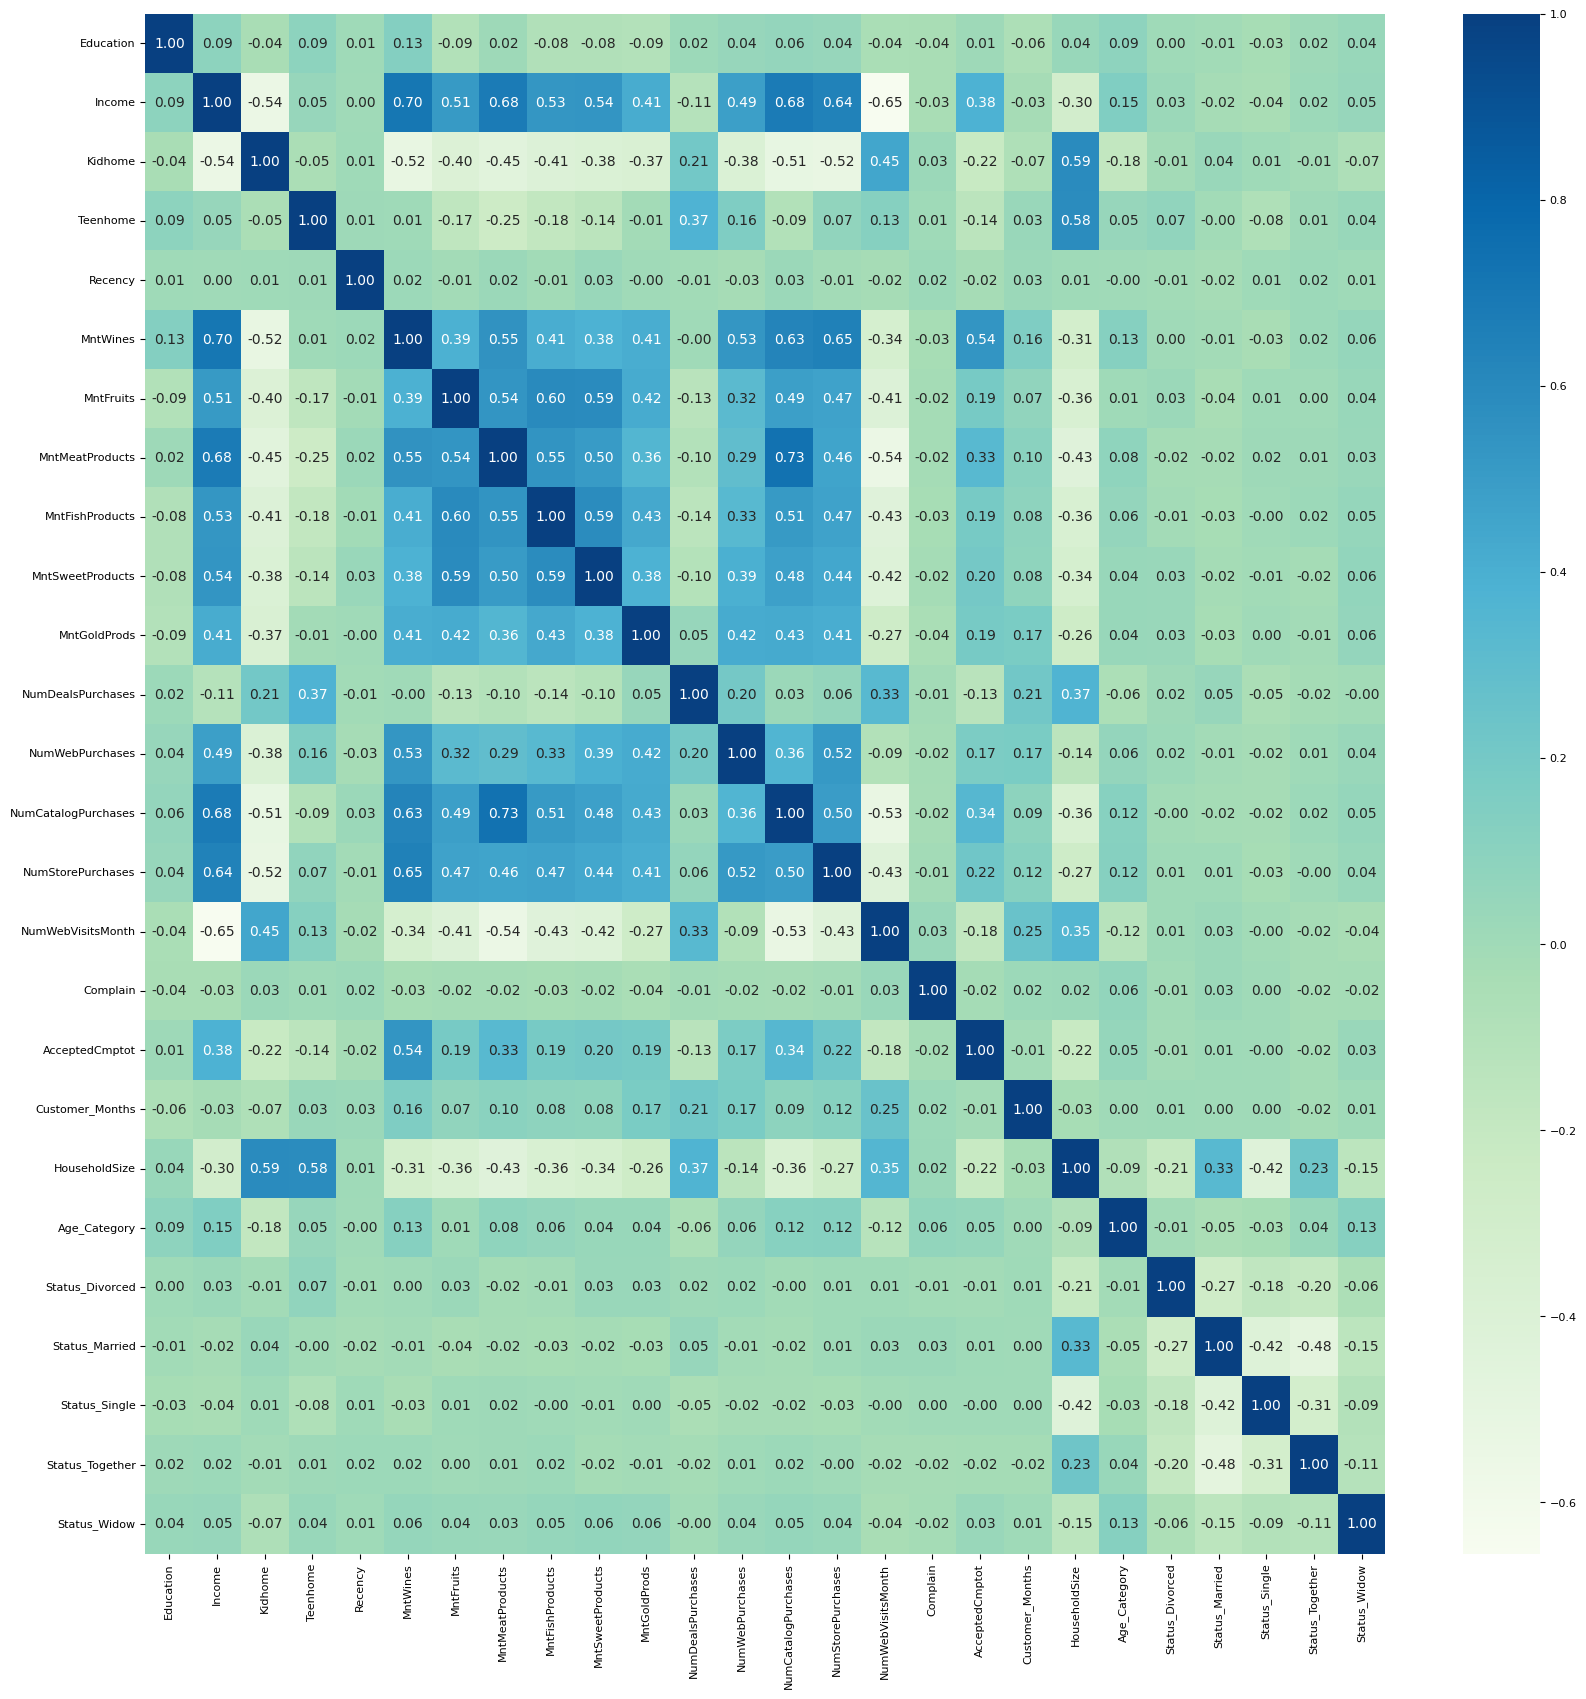

In [76]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_train.corr(), cmap='GnBu', annot=True, fmt='.2f')
plt.show()

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 994 to 860
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1568 non-null   int8   
 1   Income               1568 non-null   float64
 2   Kidhome              1568 non-null   float64
 3   Teenhome             1568 non-null   float64
 4   Recency              1568 non-null   float64
 5   MntWines             1568 non-null   float64
 6   MntFruits            1568 non-null   float64
 7   MntMeatProducts      1568 non-null   float64
 8   MntFishProducts      1568 non-null   float64
 9   MntSweetProducts     1568 non-null   float64
 10  MntGoldProds         1568 non-null   float64
 11  NumDealsPurchases    1568 non-null   float64
 12  NumWebPurchases      1568 non-null   float64
 13  NumCatalogPurchases  1568 non-null   float64
 14  NumStorePurchases    1568 non-null   float64
 15  NumWebVisitsMonth    1568 non-null   

### Handle class imbalance

In [78]:
# resampling dengan smote
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

# hasil resampling dengan smote
print(y_train_smote.value_counts())

Response
0           1329
1           1329
dtype: int64


**Mencari variabel yang datanya imbalance**

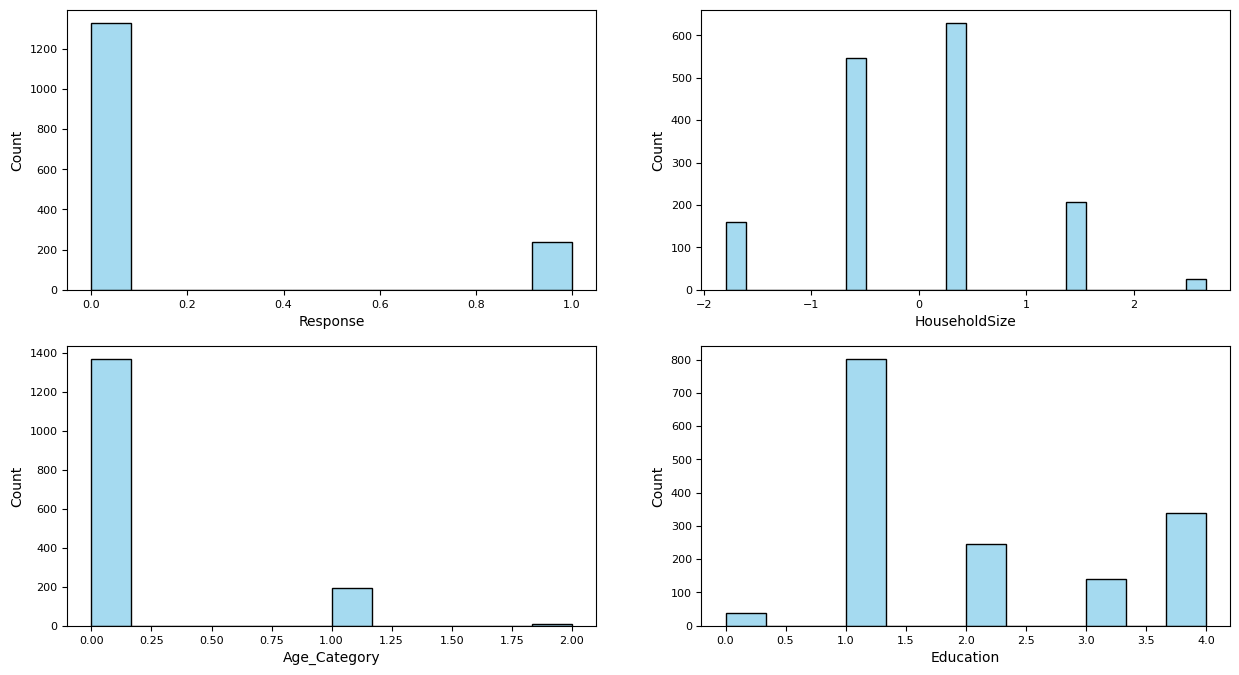

In [79]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=y_train,x='Response',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='HouseholdSize',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Age_Category',ax=axes[1,0],color='skyblue')
sns.histplot(data=X_train,x='Education',ax=axes[1,1],color='skyblue')

plt.show()

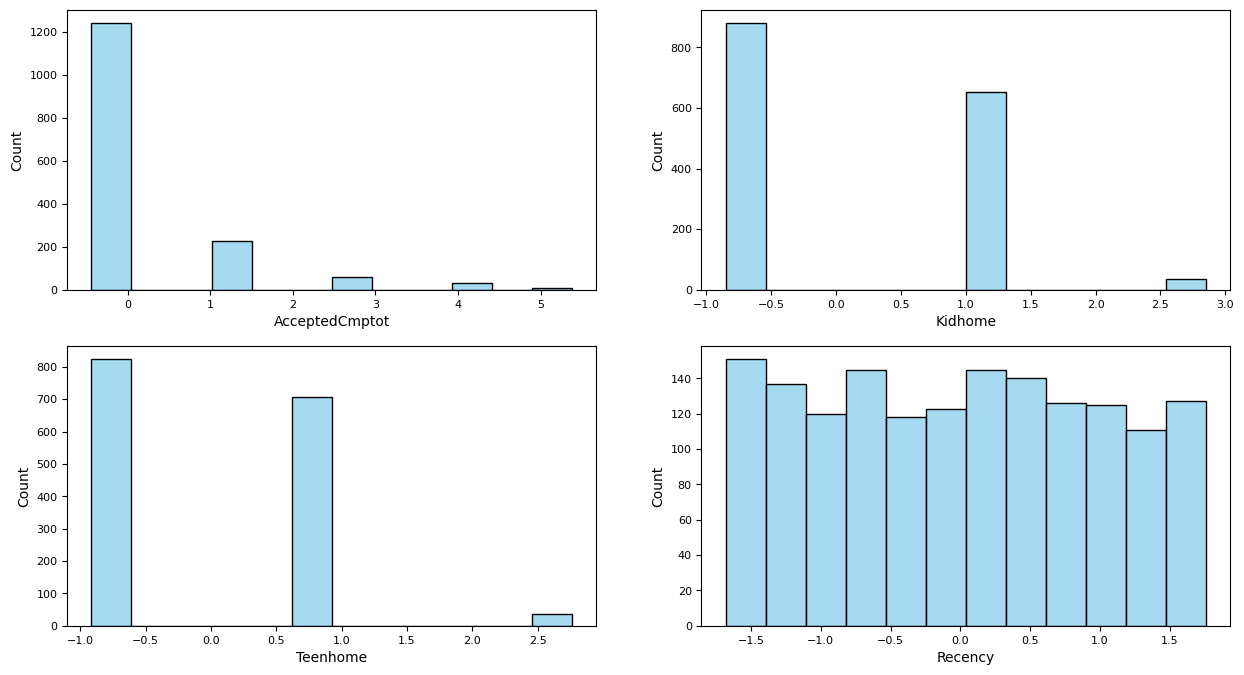

In [80]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=X_train,x='AcceptedCmptot',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='Kidhome',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Teenhome',ax=axes[1,0],color='skyblue')
sns.histplot(data=X_train,x='Recency',ax=axes[1,1],color='skyblue')

plt.show()

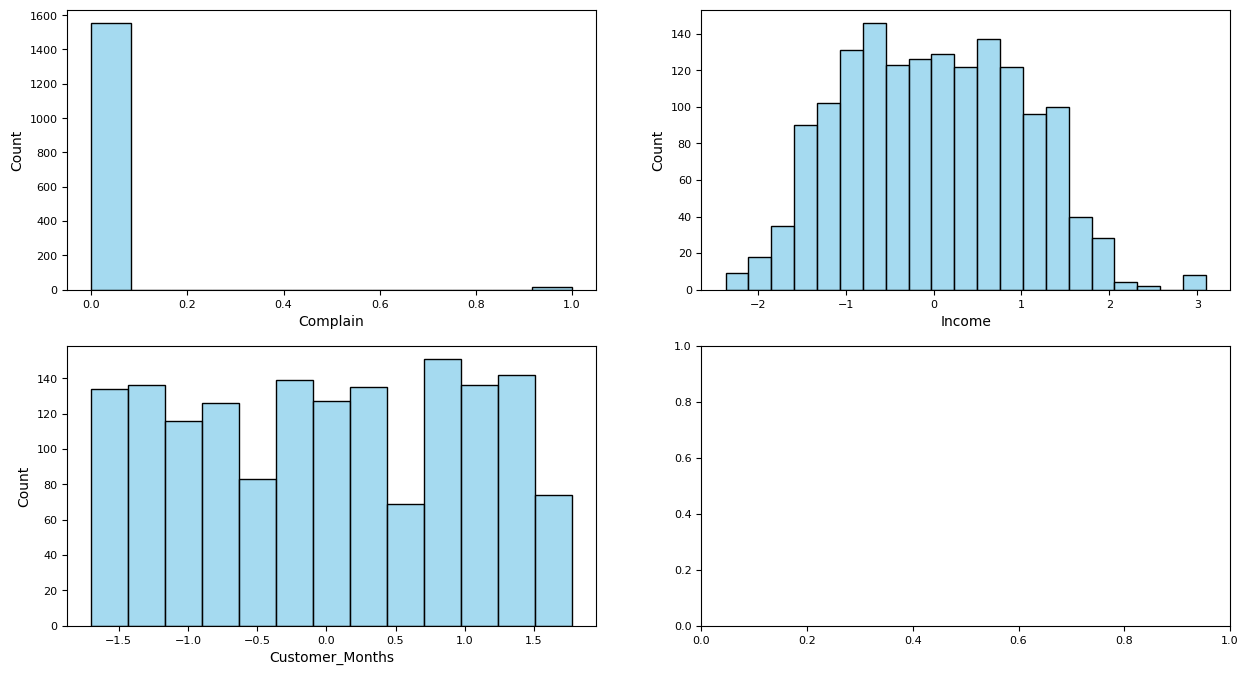

In [81]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=X_train,x='Complain',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='Income',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Customer_Months',ax=axes[1,0],color='skyblue')
#sns.histplot(data=df,x='Income',ax=axes[1,1],color='skyblue')

plt.show()

In [82]:
# pembuatan binary label target
df['response_class'] = df['Response'] > 0.8
df['response_class'].value_counts()

False    1906
True      334
Name: response_class, dtype: int64

In [83]:
# Menghitung jumlah kemunculan setiap nilai dalam variabel
value_counts = df['Response'].value_counts()

# Mengambil jumlah "yes" dan "no"
yes_count = value_counts.get('0', 1906)
no_count = value_counts.get('1', 334)

# Menghitung persentase "yes" dan "no"
total_count = len(df)
yes_percentage = (yes_count / total_count) * 100
no_percentage = (no_count / total_count) * 100

# Menampilkan hasil
print("Persentase Yes:", yes_percentage)
print("Persentase No:", no_percentage)

Persentase Yes: 85.08928571428571
Persentase No: 14.910714285714285


In [84]:
# pemisahan features vs target
#X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'response_class']]]
#y = df['response_class'].values
#print(X.shape)
#print(y.shape)

**Memproses variabel yang datanya imbalance**

In [85]:
# split ini udah aku pindah ke atas
from imblearn.over_sampling import RandomOverSampler

# Mengambil variabel 'Complain', 'Response', dan variabel lainnya dari DataFrame df
# X = df.drop(['Response'], axis=1)
# y_response = df['Response']

In [86]:
print(X_train.shape)
print('')
print(y_train.value_counts())

(1568, 26)

Response
0           1329
1            239
dtype: int64


In [87]:
# Menerapkan oversampling pada variabel 'Response' menggunakan RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Mengambil variabel 'Complain', 'Response', dan variabel lainnya dari DataFrame df

ros_response = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros_response.fit_resample(X_train, y_train)

# Menggabungkan kembali data yang telah diresampling menjadi DataFrame baru
df_over = pd.concat([X_train_over, y_train_over], axis=1)

print(df_over.shape)
print('jumlah response:')
print(df_over['Response'].value_counts())

(2658, 27)
jumlah response:
0    1329
1    1329
Name: Response, dtype: int64


In [88]:
df_over.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow', 'Response'],
      dtype='object')

In [89]:
#df_over = df_over[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
#                   'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
#                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
#                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
#                   'AcceptedCmptot', 'Age', 'Customer_Months', 'Income_new',
#                   'Status_Divorced', 'Status_Married', 'Status_Single', 'Status_Together',
#                   'Status_Widow', 'response_class', 'Response']]

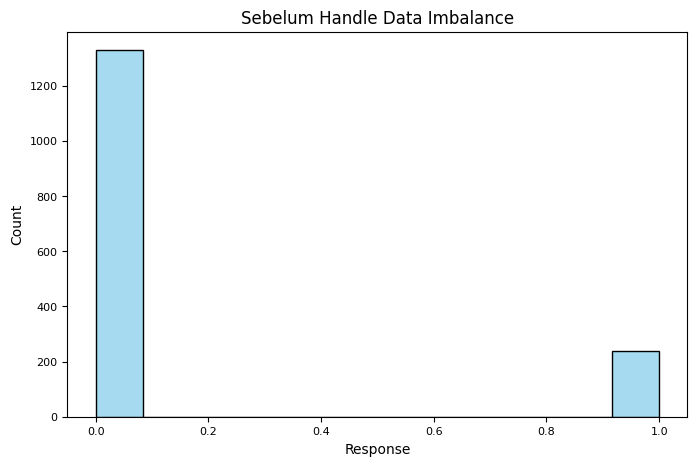

In [90]:
# sebelum dilakukan handle class imbalance
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=y_train, x='Response', color='skyblue')
plt.title('Sebelum Handle Data Imbalance', fontsize = 12) # Menambahkan jarak antar subplot
plt.show()

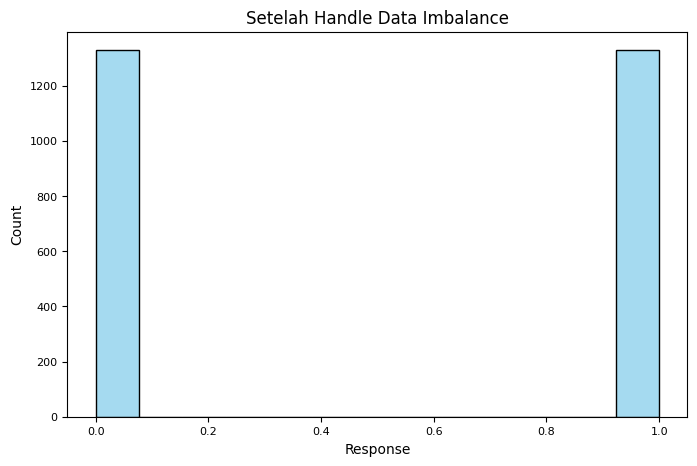

In [91]:
#sebelum dilakukan handle class imbalance
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_over, x='Response', color='skyblue')
plt.title('Setelah Handle Data Imbalance', fontsize = 12) # Menambahkan jarak antar subplot
plt.show()

**FEATURE EXTRACTION - POIN 2B**
- membuat fitur baru yaitu customer_month yang diperoleh dari DtCustomer
- menambahkan fitur baru yaitu household size
- membuat fitur age menjadi data kategorikal

**FITUR TAMBAHAN - POIN 2C**
- WebEngagement:  Menghitung tingkat interaksi pelanggan dengan situs web perusahaan Fitur ini mencerminkan seberapa sering pelanggan mengunjungi situs web dan seberapa baru kunjungan terakhir mereka.
- Jumlah cicilan
- Tempat tinggal customer: untuk mengetahui apakah customer cocok dengan campaign yang akan dibuat, apakah campaign dalam bentuk web purchase atau store purchase
- Delivery time from web purchase: lama pengiriman dapat mempengaruhi customer untuk merespon campaign

# MODELING - STAGE 3

## DATA TANPA SMOTE

In [93]:
X_train = X_train.drop(['Kidhome', 'Teenhome'], axis=1)
X_test = X_test.drop(['Kidhome', 'Teenhome'], axis=1)

In [95]:
X_train.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow'],
      dtype='object')

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba_test[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [97]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [98]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr.fit(X_train, y_train)
eval_classification(lr)

Accuracy (Train Set): 0.89
Precision (Train Set): 0.74
Recall (Train Set): 0.48
F1-Score (Train Set): 0.58
Accuracy (Test Set): 0.89
Precision (Test Set): 0.74
Recall (Test Set): 0.39
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9107442839744115
roc_auc (crossval test): 0.8981669134196391


In [100]:
# tuning parameter dengan random search
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
rs_lr = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=12, cv=5, n_iter=50)
rs_lr.fit(X_train, y_train)
eval_classification(rs_lr)

Accuracy (Train Set): 0.89
Precision (Train Set): 0.75
Recall (Train Set): 0.42
F1-Score (Train Set): 0.54
Accuracy (Test Set): 0.90
Precision (Test Set): 0.80
Recall (Test Set): 0.37
F1-Score (Test Set): 0.50
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9088131321181884
roc_auc (crossval test): 0.8984771757273553


In [101]:
show_best_hyperparameter(rs_lr) # Check the best hyperparameter after tuning

{'C': 0.04747979797979799, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


param value: 0.0001; train: 0.7899307687221966; test: 0.7349265711940162
param value: 0.0006040404040404041; train: 0.81603023634343; test: 0.7626562072425431
param value: 0.0011080808080808082; train: 0.8352600974086282; test: 0.7812824956672445
param value: 0.0016121212121212123; train: 0.8493834040128325; test: 0.7955669068685579
param value: 0.002116161616161616; train: 0.8603930346849017; test: 0.8066952476511904
param value: 0.0026202020202020205; train: 0.8683928835661506; test: 0.8155979202772965
param value: 0.0031242424242424243; train: 0.874478561601355; test: 0.8216911429353279
param value: 0.003628282828282828; train: 0.8792954717895923; test: 0.8258323451609961
param value: 0.004132323232323233; train: 0.8831175168670564; test: 0.829864088296999
param value: 0.004636363636363637; train: 0.8862374894138167; test: 0.832582322357019
param value: 0.0051404040404040416; train: 0.8889450337026298; test: 0.8347715041503239
param value: 0.005644444444444445; train: 0.891155145436

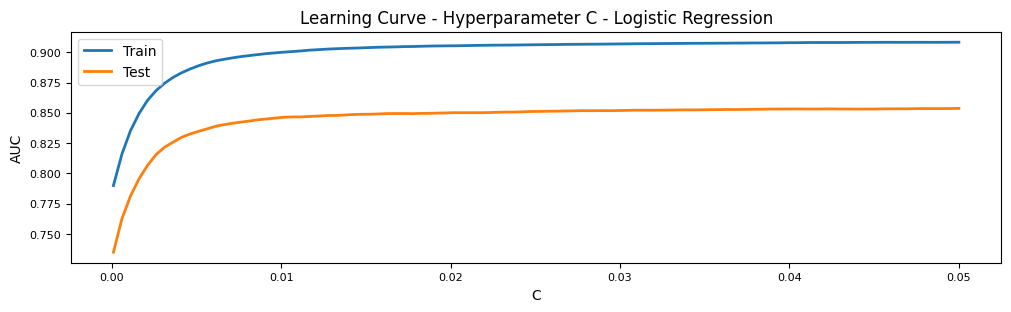

In [102]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_proba_train = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_proba_train[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba_test = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba_test[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

param value: 0.0001; train: 0.0; test: 0.0
param value: 0.0006040404040404041; train: 0.0; test: 0.0
param value: 0.0011080808080808082; train: 1.0; test: 0.0
param value: 0.0016121212121212123; train: 1.0; test: 1.0
param value: 0.002116161616161616; train: 0.9090909090909091; test: 0.8571428571428571
param value: 0.0026202020202020205; train: 0.9285714285714286; test: 0.875
param value: 0.0031242424242424243; train: 0.8947368421052632; test: 0.9090909090909091
param value: 0.003628282828282828; train: 0.9183673469387755; test: 0.9411764705882353
param value: 0.004132323232323233; train: 0.9038461538461539; test: 0.9473684210526315
param value: 0.004636363636363637; train: 0.9090909090909091; test: 0.9523809523809523
param value: 0.0051404040404040416; train: 0.9; test: 0.9545454545454546
param value: 0.005644444444444445; train: 0.873015873015873; test: 0.9166666666666666
param value: 0.006148484848484849; train: 0.873015873015873; test: 0.88
param value: 0.006652525252525254; train:

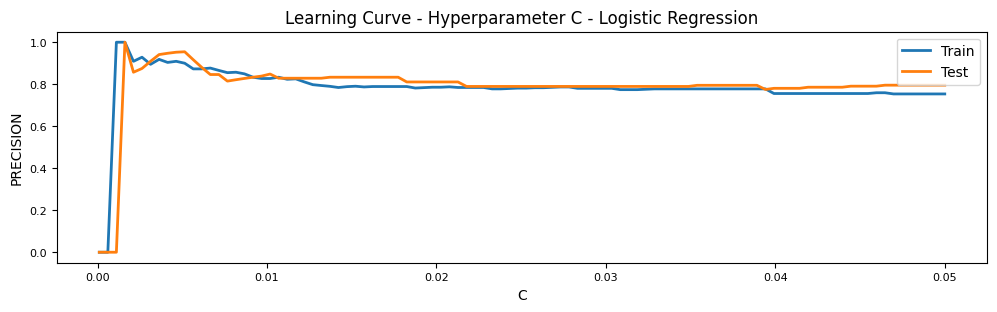

In [103]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)
        train_precision = precision_score(y_train, y_pred_train)
        train_scores.append(train_precision)

        # eval on test
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = model.predict_proba(X_test)
        test_precision = precision_score(y_test, y_pred_test)
        test_scores.append(test_precision)

        print('param value: ' + str(c) + '; train: ' + str(train_precision) + '; test: '+ str(test_precision))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('PRECISION')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

param value: 0.0001; train: 0.0; test: 0.0
param value: 0.0006040404040404041; train: 0.0; test: 0.0
param value: 0.0011080808080808082; train: 0.0041841004184100415; test: 0.0
param value: 0.0016121212121212123; train: 0.02510460251046025; test: 0.021052631578947368
param value: 0.002116161616161616; train: 0.08368200836820083; test: 0.06315789473684211
param value: 0.0026202020202020205; train: 0.1087866108786611; test: 0.07368421052631578
param value: 0.0031242424242424243; train: 0.14225941422594143; test: 0.10526315789473684
param value: 0.003628282828282828; train: 0.18828451882845187; test: 0.16842105263157894
param value: 0.004132323232323233; train: 0.19665271966527198; test: 0.18947368421052632
param value: 0.004636363636363637; train: 0.20920502092050208; test: 0.21052631578947367
param value: 0.0051404040404040416; train: 0.22594142259414227; test: 0.22105263157894736
param value: 0.005644444444444445; train: 0.2301255230125523; test: 0.23157894736842105
param value: 0.0061

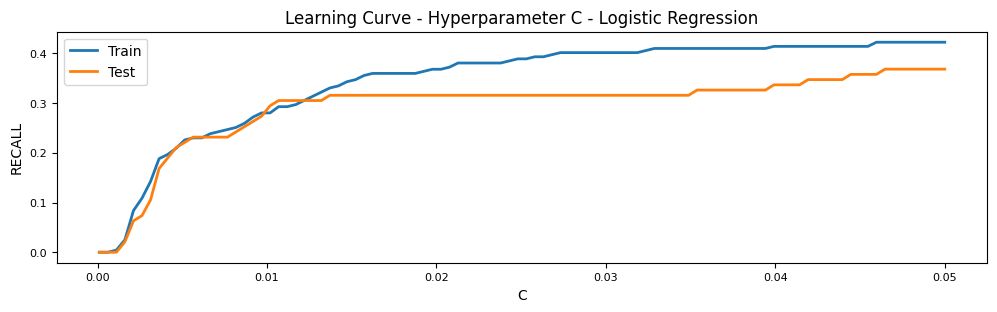

In [104]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = model.predict_proba(X_test)
        test_recall = recall_score(y_test, y_pred_test)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('RECALL')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

In [105]:
print(X_train.columns)
rs_lr.best_estimator_.coef_

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow'],
      dtype='object')


array([[ 0.23837104, -0.05483053, -0.67288736, -0.08228348,  0.12051768,
         0.27966585, -0.02191211,  0.01993636,  0.15790307,  0.14207426,
         0.2021016 ,  0.09062569, -0.39491947,  0.24694304, -0.02578418,
         0.98000566,  0.55870576, -0.42133074,  0.03102887,  0.09972586,
        -0.15607048,  0.20284457, -0.24859392,  0.10205166]])

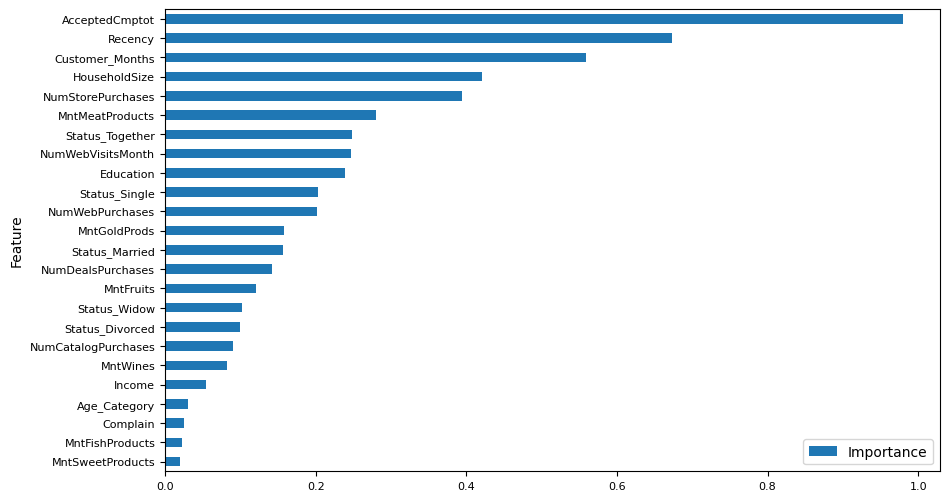

In [106]:
# feature importance lr pakai best estimator
coefficients = rs_lr.best_estimator_.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

In [107]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.253961
         Iterations 8
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.405      
Dependent Variable:   Response         AIC:              844.4210   
Date:                 2023-06-11 12:34 BIC:              973.0023   
No. Observations:     1568             Log-Likelihood:   -398.21    
Df Model:             23               LL-Null:          -669.36    
Df Residuals:         1544             LLR p-value:      5.3717e-100
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       8.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Education            0.3097   0.0746   4.1501 0.0000  0.1634  0.4560
Income              -0.0765 

In [108]:
# confusion matrix pada data test
from sklearn.metrics import confusion_matrix
rs_lr.fit(X_train, y_train)
y_pred_test = rs_lr.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[568,   9],
       [ 60,  35]])

### AdaBoost

In [109]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
eval_classification(ab)

Accuracy (Train Set): 0.92
Precision (Train Set): 0.79
Recall (Train Set): 0.64
F1-Score (Train Set): 0.71
Accuracy (Test Set): 0.89
Precision (Test Set): 0.67
Recall (Test Set): 0.48
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9629167579900804
roc_auc (crossval test): 0.8864158709449257


In [110]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 1500)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R'])

# Init model
ab = AdaBoostClassifier(random_state=42)
rs_ab = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs_ab.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_ab)

Accuracy (Train Set): 0.92
Precision (Train Set): 0.85
Recall (Train Set): 0.61
F1-Score (Train Set): 0.71
Accuracy (Test Set): 0.90
Precision (Test Set): 0.75
Recall (Test Set): 0.42
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9600204017640465
roc_auc (crossval test): 0.9000185825613813


In [111]:
show_best_hyperparameter(rs_ab) # Check the best hyperparameter after tuning

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.0681608040201005, 'n_estimators': 1176, 'random_state': 42}


param value: 0.001; train: 0.8595508624787883; test: 0.766186262884247
param value: 0.0014974874371859296; train: 0.8672343064751238; test: 0.772160904861808
param value: 0.0019949748743718593; train: 0.8798401289546676; test: 0.7948371796041229
param value: 0.002492462311557789; train: 0.8831332584036193; test: 0.7973638602572289
param value: 0.0029899497487437185; train: 0.8876495052435058; test: 0.8048070783544651
param value: 0.003487437185929648; train: 0.891312560801685; test: 0.8098330748882605
param value: 0.003984924623115577; train: 0.8941208509245004; test: 0.8147587339231962
param value: 0.0044824120603015076; train: 0.8965387509405567; test: 0.8187995986500045
param value: 0.004979899497487437; train: 0.8994887148924382; test: 0.8219465474778802
param value: 0.005477386934673366; train: 0.901942820442589; test: 0.8241539724527958
param value: 0.005974874371859296; train: 0.9051115917526941; test: 0.828194837179604
param value: 0.006472361809045226; train: 0.907719964361161

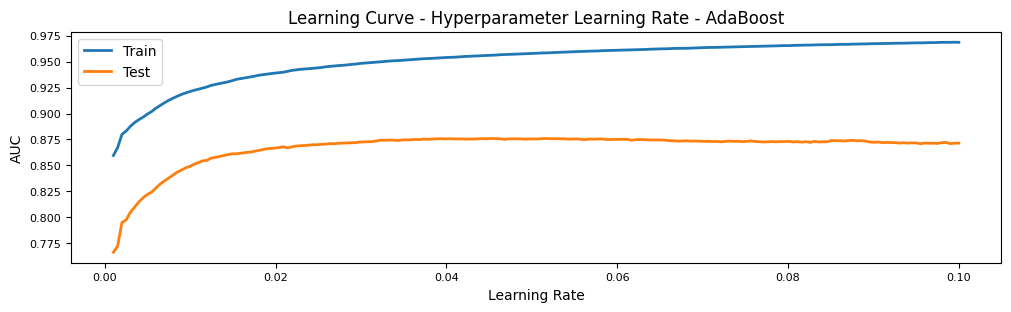

In [112]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = AdaBoostClassifier(learning_rate=c, n_estimators=1176, algorithm='SAMME.R', random_state=42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_proba_train = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_proba_train[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba_test = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba_test[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Learning Rate')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Learning Rate - AdaBoost')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)]
draw_learning_curve(param_values)

param value: 0.001; train: 1.0; test: 0.0
param value: 0.0030204081632653063; train: 1.0; test: 1.0
param value: 0.0050408163265306125; train: 0.8933333333333333; test: 0.8571428571428571
param value: 0.007061224489795919; train: 0.8350515463917526; test: 0.8148148148148148
param value: 0.009081632653061226; train: 0.8380952380952381; test: 0.7741935483870968
param value: 0.011102040816326531; train: 0.853448275862069; test: 0.7352941176470589
param value: 0.013122448979591837; train: 0.8389830508474576; test: 0.7567567567567568
param value: 0.015142857142857145; train: 0.8360655737704918; test: 0.7692307692307693
param value: 0.01716326530612245; train: 0.8455284552845529; test: 0.775
param value: 0.019183673469387756; train: 0.8461538461538461; test: 0.7804878048780488
param value: 0.02120408163265306; train: 0.8455882352941176; test: 0.7674418604651163
param value: 0.02322448979591837; train: 0.8428571428571429; test: 0.7906976744186046
param value: 0.025244897959183676; train: 0.83

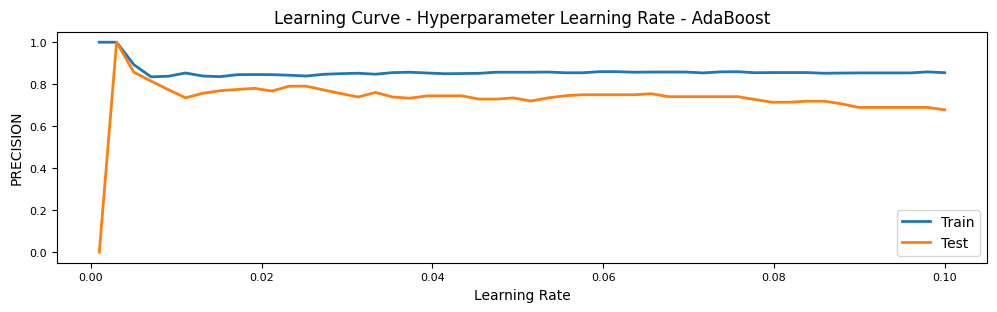

In [114]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = AdaBoostClassifier(learning_rate=c, n_estimators=1176, algorithm='SAMME.R', random_state=42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)
        train_precision = precision_score(y_train, y_pred_train)
        train_scores.append(train_precision)

        # eval on test
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = model.predict_proba(X_test)
        test_precision = precision_score(y_test, y_pred_test)
        test_scores.append(test_precision)

        print('param value: ' + str(c) + '; train: ' + str(train_precision) + '; test: '+ str(test_precision))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Learning Rate')
    plt.ylabel('PRECISION')
    plt.title('Learning Curve - Hyperparameter Learning Rate - AdaBoost')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 50)]
draw_learning_curve(param_values)

param value: 0.001; train: 0.012552301255230125; test: 0.0
param value: 0.0030204081632653063; train: 0.100418410041841; test: 0.08421052631578947
param value: 0.0050408163265306125; train: 0.2803347280334728; test: 0.18947368421052632
param value: 0.007061224489795919; train: 0.3389121338912134; test: 0.23157894736842105
param value: 0.009081632653061226; train: 0.3682008368200837; test: 0.25263157894736843
param value: 0.011102040816326531; train: 0.41422594142259417; test: 0.2631578947368421
param value: 0.013122448979591837; train: 0.41422594142259417; test: 0.29473684210526313
param value: 0.015142857142857145; train: 0.42677824267782427; test: 0.3157894736842105
param value: 0.01716326530612245; train: 0.4351464435146444; test: 0.3263157894736842
param value: 0.019183673469387756; train: 0.4602510460251046; test: 0.3368421052631579
param value: 0.02120408163265306; train: 0.4811715481171548; test: 0.3473684210526316
param value: 0.02322448979591837; train: 0.49372384937238495; te

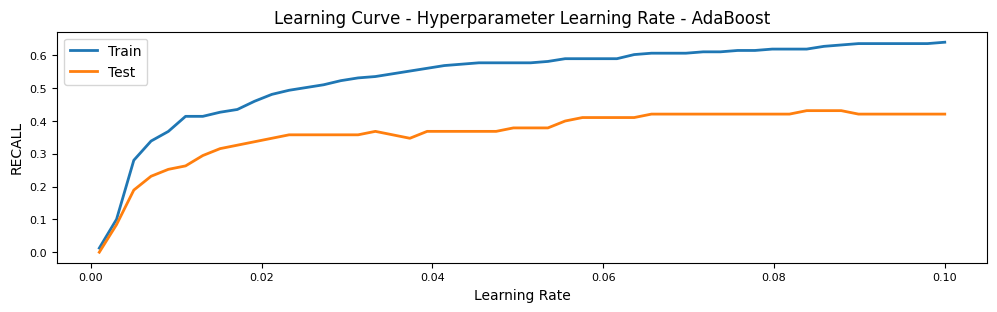

In [115]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = AdaBoostClassifier(learning_rate=c, n_estimators=1176, algorithm='SAMME.R', random_state=42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = model.predict_proba(X_test)
        test_recall = recall_score(y_test, y_pred_test)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Learning Rate')
    plt.ylabel('RECALL')
    plt.title('Learning Curve - Hyperparameter Learning Rate - AdaBoost')
    plt.legend()
    plt.show()

 # learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 50)]
draw_learning_curve(param_values) 

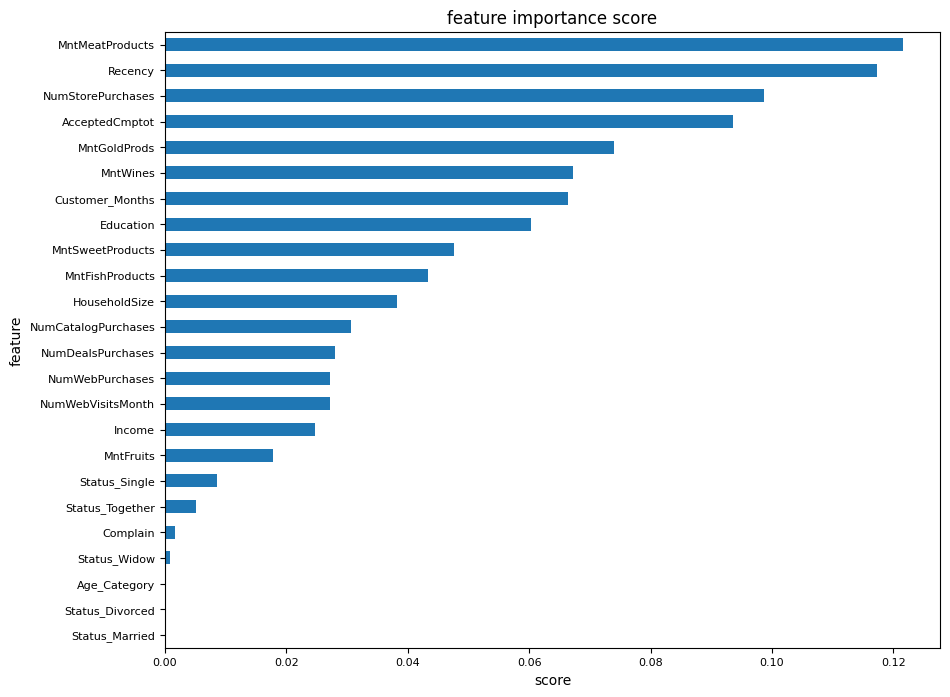

In [116]:
show_feature_importance(rs_ab.best_estimator_)

### Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.99
Precision (Train Set): 0.98
Recall (Train Set): 0.98
F1-Score (Train Set): 0.98
Accuracy (Test Set): 0.88
Precision (Test Set): 0.68
Recall (Test Set): 0.29
F1-Score (Test Set): 0.41
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9998503463498908
roc_auc (crossval test): 0.8940172301991429


In [121]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=12)
rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=12, cv=5)
rs_rf.fit(X_train, y_train)
eval_classification(rs_rf)

Accuracy (Train Set): 0.90
Precision (Train Set): 0.96
Recall (Train Set): 0.36
F1-Score (Train Set): 0.52
Accuracy (Test Set): 0.87
Precision (Test Set): 0.71
Recall (Test Set): 0.13
F1-Score (Test Set): 0.21
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9905755744329907
roc_auc (crossval test): 0.8915171773774059


In [122]:
show_best_hyperparameter(rs_rf)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 66, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 12, 'min_samples_split': 18, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 102, 'n_jobs': None, 'oob_score': False, 'random_state': 12, 'verbose': 0, 'warm_start': False}


param value: 2; train: 0.9992302388620757; test: 0.8802882422694518
param value: 4; train: 0.9951878122727316; test: 0.8803794581775062
param value: 6; train: 0.9858625260128892; test: 0.8683024719511083
param value: 8; train: 0.9774219141078799; test: 0.8721335400893916
param value: 10; train: 0.9707002779955357; test: 0.8710024628295174
param value: 12; train: 0.963509544093618; test: 0.8661315333394145
param value: 14; train: 0.9578929638479872; test: 0.8711484082824045
param value: 16; train: 0.9538820203317686; test: 0.8716227310042872
param value: 18; train: 0.9451391709247523; test: 0.8591991243272827
param value: 20; train: 0.9429007244255126; test: 0.855714676639606
param value: 22; train: 0.9409897018867807; test: 0.8599106084101067
param value: 24; train: 0.9350866256757054; test: 0.8609322265803157
param value: 26; train: 0.9337674849117373; test: 0.8547660311958405
param value: 28; train: 0.9294133758984482; test: 0.8520660403174314
param value: 30; train: 0.92535835607985

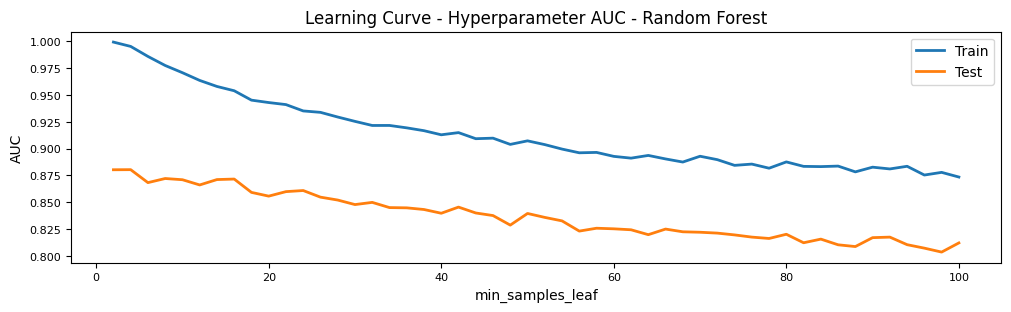

In [123]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 100, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=102, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_proba_train = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba_test = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.title('Learning Curve - Hyperparameter AUC - Random Forest')
plt.legend()
plt.show()

param value: 2; train: 0.981651376146789; test: 0.7222222222222222
param value: 4; train: 0.9751552795031055; test: 0.7419354838709677
param value: 6; train: 0.9838709677419355; test: 0.7727272727272727
param value: 8; train: 0.9649122807017544; test: 0.7777777777777778
param value: 10; train: 0.9611650485436893; test: 0.631578947368421
param value: 12; train: 0.9743589743589743; test: 0.7333333333333333
param value: 14; train: 0.9857142857142858; test: 0.7142857142857143
param value: 16; train: 0.9594594594594594; test: 0.8181818181818182
param value: 18; train: 0.9384615384615385; test: 0.7333333333333333
param value: 20; train: 0.9836065573770492; test: 0.6923076923076923
param value: 22; train: 0.9574468085106383; test: 0.8
param value: 24; train: 0.9512195121951219; test: 0.75
param value: 26; train: 0.9565217391304348; test: 0.8
param value: 28; train: 0.9629629629629629; test: 1.0
param value: 30; train: 0.9615384615384616; test: 1.0
param value: 32; train: 0.9285714285714286; t

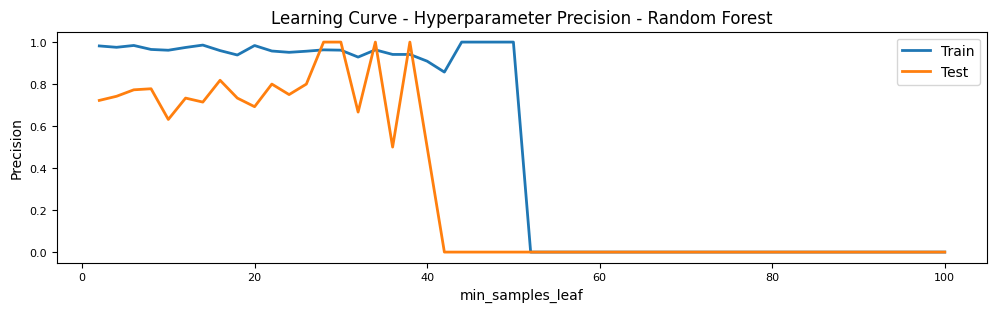

In [124]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 100, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=102, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_scores.append(train_precision)

    # eval on test
    y_pred_test = model.predict(X_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_scores.append(test_precision)

    print('param value: ' + str(c) + '; train: ' + str(train_precision) + '; test: '+ str(test_precision))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('min_samples_leaf')
plt.ylabel('Precision')
plt.title('Learning Curve - Hyperparameter Precision - Random Forest')
plt.legend()
plt.show()

param value: 2; train: 0.9037656903765691; test: 0.3157894736842105
param value: 4; train: 0.6150627615062761; test: 0.24210526315789474
param value: 6; train: 0.5313807531380753; test: 0.18947368421052632
param value: 8; train: 0.4393305439330544; test: 0.18947368421052632
param value: 10; train: 0.37656903765690375; test: 0.14736842105263157
param value: 12; train: 0.3598326359832636; test: 0.12631578947368421
param value: 14; train: 0.3263598326359833; test: 0.11578947368421053
param value: 16; train: 0.2719665271966527; test: 0.10526315789473684
param value: 18; train: 0.2928870292887029; test: 0.10526315789473684
param value: 20; train: 0.19246861924686193; test: 0.06315789473684211
param value: 22; train: 0.24267782426778242; test: 0.09473684210526316
param value: 24; train: 0.16317991631799164; test: 0.08421052631578947
param value: 26; train: 0.1297071129707113; test: 0.05263157894736842
param value: 28; train: 0.16736401673640167; test: 0.06315789473684211
param value: 30; tra

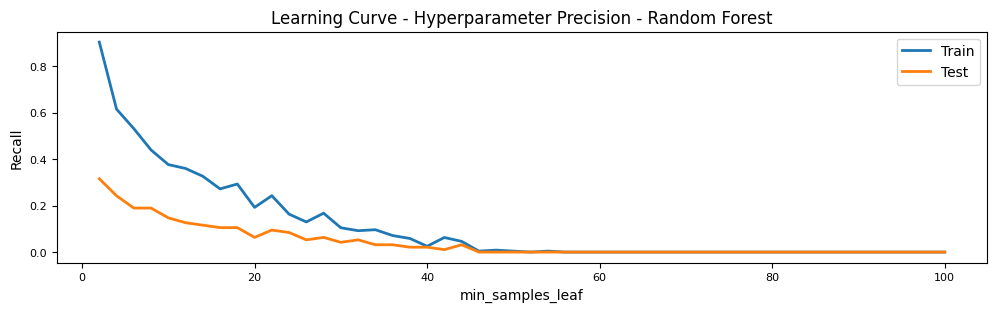

In [125]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 100, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=102, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('min_samples_leaf')
plt.ylabel('Recall')
plt.title('Learning Curve - Hyperparameter Precision - Random Forest')
plt.legend()
plt.show()

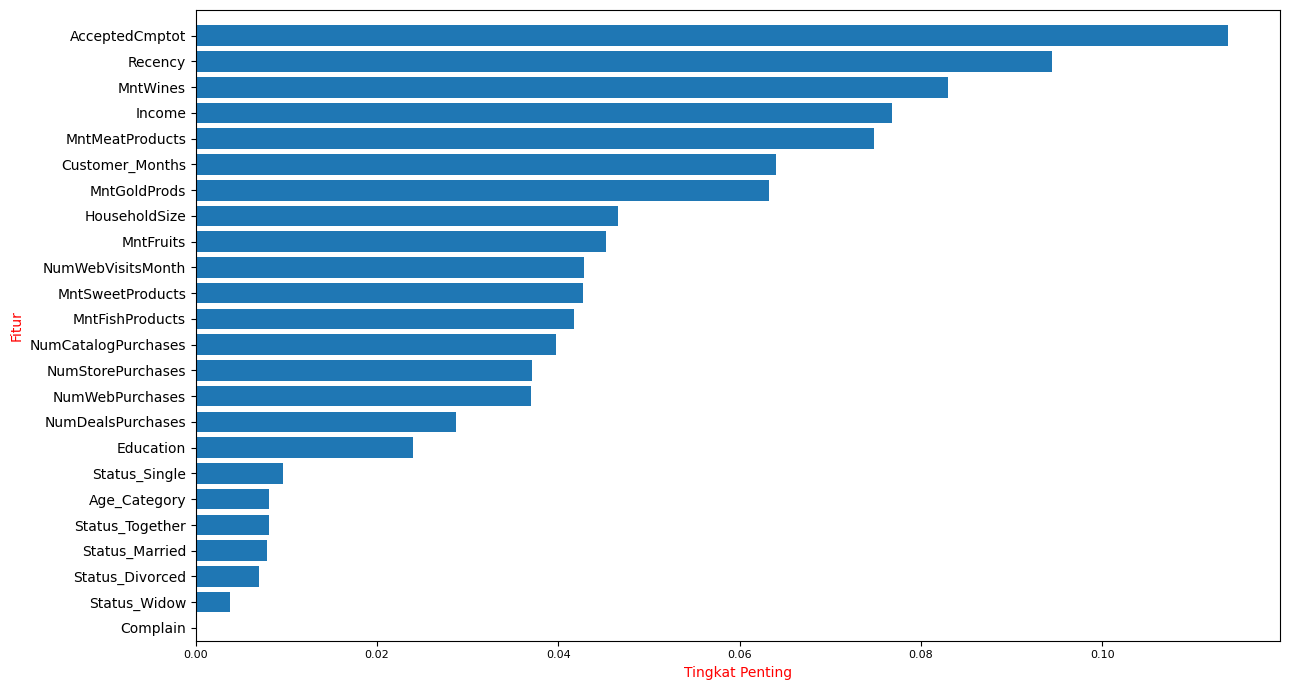

In [128]:
#ahya
import matplotlib.pyplot as plt

# Mendapatkan feature importance dari model
feature_importance = rf.fit(X_train, y_train).feature_importances_

# Mengurutkan feature importance secara menurun
indices = np.argsort(feature_importance)[::-1]

# Mengambil nama fitur yang diurutkan berdasarkan importance
sorted_features = [X_train.columns[i] for i in indices]

# Mengubah urutan fitur
sorted_features = sorted_features[::-1]


# Membuat grafik feature importance
plt.figure(figsize=(13, 7))
#plt.title("Tingkat Kepentingan Fitur", fontsize = 20)
plt.barh(range(len(feature_importance)), feature_importance[indices][::-1])
plt.yticks(range(len(feature_importance)), sorted_features, fontsize=10)
plt.ylabel("Fitur", color = "r")
plt.xlabel("Tingkat Penting", color = "r")
plt.ylim(-0.5, len(feature_importance))
plt.tight_layout()
plt.show()

## DATA SMOTE

In [131]:
X_train_smote = X_train_smote.drop(['Kidhome', 'Teenhome'], axis=1)

In [132]:
X_train = X_train_smote
y_train = y_train_smote

### Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr.fit(X_train, y_train)
eval_classification(lr)

Accuracy (Train Set): 0.87
Precision (Train Set): 0.89
Recall (Train Set): 0.85
F1-Score (Train Set): 0.87
Accuracy (Test Set): 0.85
Precision (Test Set): 0.46
Recall (Test Set): 0.56
F1-Score (Test Set): 0.50
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.95
roc_auc (crossval train): 0.9523598817605462
roc_auc (crossval test): 0.9471440837872805


In [134]:
# tuning parameter dengan random search
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
rs_lr = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=12, cv=5, n_iter=50)
rs_lr.fit(X_train, y_train)
eval_classification(rs_lr)

Accuracy (Train Set): 0.85
Precision (Train Set): 0.86
Recall (Train Set): 0.85
F1-Score (Train Set): 0.85
Accuracy (Test Set): 0.83
Precision (Test Set): 0.44
Recall (Test Set): 0.64
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.938074457255887
roc_auc (crossval test): 0.9337029621862858


In [135]:
show_best_hyperparameter(rs_lr)

{'C': 0.04747979797979799, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### AdaBoost

In [136]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
eval_classification(ab)

Accuracy (Train Set): 0.92
Precision (Train Set): 0.92
Recall (Train Set): 0.92
F1-Score (Train Set): 0.92
Accuracy (Test Set): 0.86
Precision (Test Set): 0.51
Recall (Test Set): 0.58
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9812466025167488
roc_auc (crossval test): 0.9621559555720056


In [138]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 1500)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 100)],  
                       algorithm = ['SAMME', 'SAMME.R'])

# Init model
ab = AdaBoostClassifier(random_state=42)
rs_ab = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs_ab.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_ab)

Accuracy (Train Set): 0.93
Precision (Train Set): 0.93
Recall (Train Set): 0.93
F1-Score (Train Set): 0.93
Accuracy (Test Set): 0.88
Precision (Test Set): 0.56
Recall (Test Set): 0.57
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9868027795452796
roc_auc (crossval test): 0.9700443725287116


In [139]:
show_best_hyperparameter(rs_ab) # Check the best hyperparameter after tuning

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.07300000000000001, 'n_estimators': 1189, 'random_state': 42}


### Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.87
Precision (Test Set): 0.56
Recall (Test Set): 0.51
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999795659441773
roc_auc (crossval test): 0.9877939813358051


In [141]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=12)
rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=12, cv=5)
rs_rf.fit(X_train, y_train)
eval_classification(rs_rf)

Accuracy (Train Set): 0.99
Precision (Train Set): 0.99
Recall (Train Set): 0.99
F1-Score (Train Set): 0.99
Accuracy (Test Set): 0.87
Precision (Test Set): 0.55
Recall (Test Set): 0.51
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9994976500686089
roc_auc (crossval test): 0.9844052854508238


In [142]:
show_best_hyperparameter(rs_rf)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110, 'n_jobs': None, 'oob_score': False, 'random_state': 12, 'verbose': 0, 'warm_start': False}


## SHAP - Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_sh = RandomForestClassifier(random_state=42)
rf_sh.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.3 MB/s eta 0:00:00


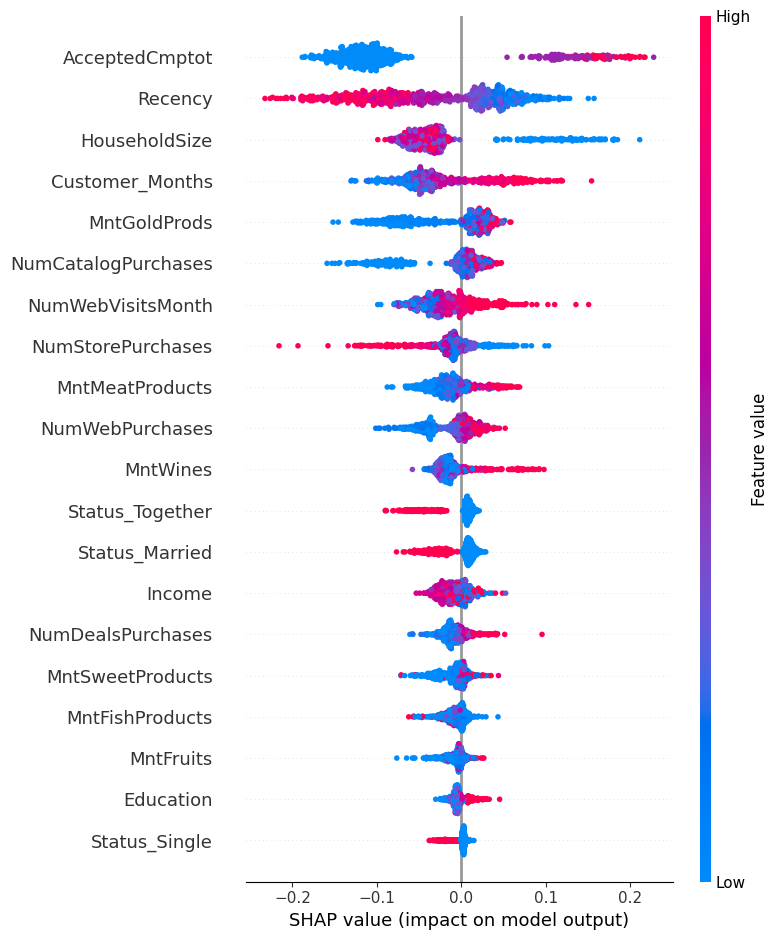

In [151]:
import shap
explainer = shap.TreeExplainer(rf_sh)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

In [152]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])